In [1]:
import numpy as np
import pandas as pd
import urllib.request
import json
import csv
import os
from bs4 import BeautifulSoup
import sys
import seaborn as sns
import math
from datetime import date
import operator
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch


from sklearn.linear_model import LinearRegression
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold # import KFold



In [2]:
# ###  Here ball by ball records in json files are extracted for given match ids  from below given links. 
# #### Works for Python3
# import json
# import ast
# import pandas as pd
# import numpy as np
# import csv
# import sys
# import matplotlib.pyplot as plt
# import seaborn as sns
# from urllib.request import urlopen
# from bs4 import BeautifulSoup
# import time
# year= '2019'  # Year in which match was happening

# # match Ids, for which match records needs to be extracted. 
# matchIds=["1134034", "1134035", "1122283", "1134036", "1122284", "1134037", "1115775"]

# errlist=[]
# f = open("errors", 'w')

# allMatchSummary = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchSummary/allODIMatchesSummary_DetailInfo_2001_2019.csv', sep=',')

# #allMatchSummary = allMatchSummary.iloc[:3]
# #print(allMatchSummary['matchId'])

# for i in range(len(allMatchSummary['matchId'])):# matchIds:
#     matid= allMatchSummary['matchId'].iloc[i]
#     year = str(allMatchSummary['year'].iloc[i])
#     try:
#         if(i%100==0):
#             print('Done', i)
#     #setting up the master json.
#         master={}
#         master['teams'] = {}
#         master['runs'] = {}

#     #getting runs[innings1]	
#         wagon1= "http://www.espncricinfo.com//ci/engine/match/live/gfx/"+str(matid)+".json?inning=1;template=wagon"
       
#         html = urlopen(wagon1)

#         soupwagon1 = BeautifulSoup(html.read(), 'lxml')#'lxml')
       
#         soupwagon1.prettify()
#         #print(soupwagon1)
#         w1=soupwagon1.find('p')
#         #print('w1', w1)
#         b1=w1.text
#         js1=str(b1)
#         inp1=json.loads(js1)
#         master['runs']['inn1']= inp1['runs']

#         time.sleep(2)
    

#     #getting ball by ball records for innings 
#         wagon2= "http://www.espncricinfo.com//ci/engine/match/live/gfx/"+str(matid)+".json?inning=2;template=wagon"
#         soupwagon2 = BeautifulSoup(urlopen(wagon2).read(), "lxml")
#         soupwagon2.prettify()
#         w2=soupwagon2.find('p')
#         b2=w2.text
#         js2=str(b2)
#         inp2=json.loads(js2)
#         master['runs']['inn2']= inp2['runs']
#         time.sleep(2)

#     #getting teams, wickets

#         player1= "http://www.espncricinfo.com/ci/engine/match/live/gfx/"+str(matid)+".json?template=pie_wickets"
#         soupplayer1 = BeautifulSoup(urlopen(player1).read(), "lxml")
#         soupplayer1.prettify()
#         wp1=soupplayer1.find('p')
#         bp1=wp1.text
#         jsp1=str(bp1)
#         pinp1=json.loads(jsp1)

#         for i,v in enumerate(pinp1['t2']['p']):
#             for key,value in v.items():
#                 pinp1['t2']['p'][i]={}
#                 pinp1['t2']['p'][i]['id']=key
#                 pinp1['t2']['p'][i]['name']=value

#         for i,v in enumerate(pinp1['t1']['p']):
#             for key,value in v.items():
#                 pinp1['t1']['p'][i]={}
#                 pinp1['t1']['p'][i]['id']=key
#                 pinp1['t1']['p'][i]['name']=value


#         master['teams'] = pinp1
        
#         #Save file with below name .
#         with open('AllODIs_extractOn11Feb20/'+str(matid)+'_'+master['teams']['t1']['n']+'_'+master['teams']['t2']['n']+'_2_'+str(year)+'.json', 'w') as json_file:
#                 json.dump(master, json_file)
#         time.sleep(2)

#     except Exception: 
#         errlist.append(matid)

# f.write(str(errlist))




In [3]:
dlsTable = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/DLSResoucePercentageMatrix.csv', header=None)

In [4]:
dlsTable

,0,1,2,3,4,5,6,7,8,9
0,100.0,93.4,85.1,74.9,62.7,49.0,34.9,22.0,11.9,4.7
1,99.8,93.2,85.0,74.8,62.7,49.0,34.9,22.0,11.9,4.7
2,99.7,93.1,84.9,74.7,62.6,48.9,34.9,22.0,11.9,4.7
3,99.5,93.0,84.8,74.6,62.6,48.9,34.9,22.0,11.9,4.7
4,99.4,92.8,84.7,74.6,62.5,48.9,34.9,22.0,11.9,4.7
...,...,...,...,...,...,...,...,...,...,...
296,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.3,2.2,1.9
297,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.5
298,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.1
299,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6


In [5]:
dlsTable[0][1]

99.8

In [7]:
#matchSummariesLocation =  'C:/python/All_ODIs_2001_19_top10Teams/' #'F:/LUMS/Cricket Data/Data Files/All ODIs/'





def measureLewisContribution(matchIdsArray,inngsGiven):
    
    currentMatchBowlingContribution={}
    currentMatchBattingContribution={}
    currentMatchNetContribution={}


    matchSummariesLocation= 'C:/python/Scripts/JupyterNotebooks/All ODIs/'

    list_of_files = os.listdir(matchSummariesLocation)

    currentOver=1
                             
    matchIds =  matchIdsArray  #['65642']#,'66331','66332','66333','66334','66336','66337','66338','66339']

    team1Players =[]
    team2Players =[]

    avgInningRuns = 235
    matchCount=0
    for matchId in  matchIds:#  matchSummariesFiltered['matchId']: #
        matchId= str(matchId)
       
        if(matchCount%100==0):
            print('done',matchCount)

    #        break
        for matchFile in list_of_files:
            matchCount=matchCount+1

            if 1==1:#try:
                matchIdinFile = matchFile.split('_')[0]

                if(matchIdinFile.find("new")>=0):
                    fileMatchId = matchIdinFile[3:]
                else:
                    fileMatchId= matchIdinFile


                     #print(fileMatchId,matchId)
                if str(matchId)==str(fileMatchId):# matchIdinFile.contains(str(matchId)):
                    #print(matchFile)
                    
                    data_file = open(matchSummariesLocation+str(matchFile))

                    data = json.load(data_file)
                    if 1==1: #for inngs in range(1,3):
                        #print("dataFile", data_file)
                        inngs= inngsGiven
                        if 1==1: #(len(data['runs']['inn'+str(inngs)])>1):

                            overId=0


                            runsScoredtillNow=0

                            runsScored=0

                            runsCurrOvrbyBatsman1=0
                            runsCurrOvrbyBatsman2=0

                            ballsCurrOvrbyBatsman1=0
                            ballsCurrOvrbyBatsman2=0

                            playersCurrOvrScores= np.zeros(11)
                            playersCurrOvrBalls = np.zeros(11)


                            batsmenOnCrease =[]
                            playersScores= np.zeros(11)
                            playersBalls = np.zeros(11)
                            wicketsLost = {}

                            ballNo=0
                            wicketLostCount=0
                            wicketLostCountNextBall=0


                            wicketLostinOvr=[]

                            for i in range(len(data['teams']['t'+str(inngs)]['w'])):
                                ovr,ball = str(data['teams']['t'+str(inngs)]['w'][int(i)]['ovr']).split('.')
                                ballNo = (6*int(ovr))+int(ball)
                                ovr = int(ovr)+1
                                #print('wicket ball', ballNo)
                                wicketsLost[ballNo] = str(data['teams']['t'+str(inngs)]['w'][int(i)]['out'])


                            ballNo=0
                            wicketLostCount=0
                            wicketLostCountNextBall=0

                            #matchdata = matchSummariesFiltered[matchSummariesFiltered['matchId']==int(matchId)].iloc[0]  


                            team1Players =[]
                            team2Players =[]
                            if (inngs)==1:
                                for p in range(11):      
                                    team1Players.append(str(data['teams']['t'+str(inngs)]['p'][int(p)]['id']))
                                    if str(data['teams']['t'+str(inngs)]['p'][int(p)]['id']) in currentMatchBattingContribution:
                                        pass
                                    else:
                                        currentMatchBattingContribution[str(data['teams']['t'+str(inngs)]['p'][int(p)]['id'])] = 0
                                        #currentMatchBowlingContribution[str(data['teams']['t'+str(inngs)]['p'][int(p)]['id'])] = 0
                                        currentMatchNetContribution[str(data['teams']['t'+str(inngs)]['p'][int(p)]['id'])] = 0
                                 
                                for p in range(11):      
                                    team2Players.append(str(data['teams']['t2']['p'][int(p)]['id']))
                                    if str(data['teams']['t2']['p'][int(p)]['id']) in currentMatchBowlingContribution:
                                         pass
                                    else:
                                        #currentMatchBattingContribution[str(data['teams']['t2']['p'][int(p)]['id'])] = 0
                                        currentMatchBowlingContribution[str(data['teams']['t2']['p'][int(p)]['id'])] = 0
                        
                            else:
                                for p in range(11):      
                                    team1Players.append(str(data['teams']['t'+str(inngs)]['p'][int(p)]['id']))
                                    if str(data['teams']['t'+str(inngs)]['p'][int(p)]['id']) in currentMatchBattingContribution:
                                        pass
                                    else:
                                        currentMatchBattingContribution[str(data['teams']['t'+str(inngs)]['p'][int(p)]['id'])] = 0
                                        #currentMatchBowlingContribution[str(data['teams']['t'+str(inngs)]['p'][int(p)]['id'])] = 0
                                        currentMatchNetContribution[str(data['teams']['t'+str(inngs)]['p'][int(p)]['id'])] = 0
                         
                                for p in range(11):      
                                    team2Players.append(str(data['teams']['t1']['p'][int(p)]['id']))
                                    if str(data['teams']['t1']['p'][int(p)]['id']) in currentMatchBowlingContribution:
                                        pass
                                    else:
                                        #currentMatchBattingContribution[str(data['teams']['t2']['p'][int(p)]['id'])] = 0
                                        currentMatchBowlingContribution[str(data['teams']['t1']['p'][int(p)]['id'])] = 0

                                            
                                            
#                                 for p in range(11):      
#                                 team2Players.append(str(data['teams']['t2']['p'][int(p)]['id']))
#                                 if str(data['teams']['t2']['p'][int(p)]['id']) in currentMatchBowlingContribution:
#                                     pass
#                                 else:
#                                     currentMatchBattingContribution[str(data['teams']['t2']['p'][int(p)]['id'])] = 0
#                                     currentMatchBowlingContribution[str(data['teams']['t2']['p'][int(p)]['id'])] = 0
#                                     currentMatchNetContribution[str(data['teams']['t2']['p'][int(p)]['id'])] = 0


                            for i in range(len(data['runs']['inn'+str(inngs)])): 
                                batsmanId = str(data['runs']['inn'+str(inngs)][int(i)]['bat'])
                                bowlerId = str(data['runs']['inn'+str(inngs)][int(i)]['bowl'])
                                ovr,ball = str(data['runs']['inn'+str(inngs)][int(i)]['ovr']).split('.')
                                ballNo = (6*int(ovr))+int(ball)
                                if(i>0):
                                    povr,preball = str(data['runs']['inn'+str(inngs)][int(i)-1]['ovr']).split('.')
                                    preBallNo = (6*int(povr))+int(preball)
                                else:
                                    preBallNo=0


                                #print('ballNo',ballNo, 'BatsmanId', batsmanId)


                                if(batsmanId not in batsmenOnCrease):
                                    batsmenOnCrease.append(batsmanId)

                                if preBallNo in wicketsLost.keys(): # and str(wicketsLost[ballNo]) in batsmenOnCrease:
                                    #print('wicket on this',wicketsLost[ballNo],'ball No',ballNo )
                                    wicketLostCount=wicketLostCount+1
                                    #batsmenOnCrease.remove((wicketsLost[ballNo]))

                                if ballNo in wicketsLost.keys(): # and str(wicketsLost[ballNo]) in batsmenOnCrease:
                                    #print('wicket on this',wicketsLost[ballNo],'ball No',ballNo )
                                    wicketLostCountNextBall = wicketLostCountNextBall+1
                                    #batsmenOnCrease.remove((wicketsLost[ballNo]))

                                #print('i ', i,'ballNo  ',ballNo,wicketLostCount,wicketLostCountNextBall)

        #                         print("remaining Balls", preBallNo)

                                if(ballNo==1):
                                    ballExpected = (dlsTable[0][0]/100)*avgInningRuns - (dlsTable[wicketLostCountNextBall][ballNo]/100)*avgInningRuns 
                                    #print("here in If", ballExpected)
                                else:


                                    if(wicketLostCountNextBall<10):   
                                        if(ballNo<300):
                                            ballExpected = (dlsTable[wicketLostCount][preBallNo]/100)*avgInningRuns - (dlsTable[wicketLostCountNextBall][ballNo]/100)*avgInningRuns 
                                        else:
                                            ballExpected = (dlsTable[wicketLostCountNextBall][ballNo]/100)*avgInningRuns# -dlsTable[wicketLostCount][300-ballNo-1] 
                                    else:
                                        break

                                #print('ballNo',ballNo,'ballExpected',ballExpected)    

                                actualBallRuns  = int(data['runs']['inn'+str(inngs)][int(i)]['r'])

                                ballContribution= actualBallRuns - ballExpected

                                bowlContribution =  ballExpected - int(data['runs']['inn'+str(inngs)][int(i)]['r_t'])

                                try:
                                    currentMatchBattingContribution[str(batsmanId)] = currentMatchBattingContribution[str(batsmanId)]+ ballContribution
                                    #currentMatchNetContribution[str(batsmanId)] = currentMatchNetContribution[str(batsmanId)]+ ballContribution

                                except KeyError:
                                    currentMatchBattingContribution[str(batsmanId)] =  ballContribution
                                    #currentMatchNetContribution[str(batsmanId)] = ballContribution


                                try:
                                    currentMatchBowlingContribution[str(bowlerId)] = currentMatchBowlingContribution[str(bowlerId)]+  bowlContribution
                                    #currentMatchNetContribution[str(batsmanId)] = currentMatchNetContribution[str(bowlerId)]+ bowlContribution

                                except KeyError:
                                    currentMatchBowlingContribution[str(bowlerId)] =  bowlContribution
                                    #currentMatchNetContribution[str(bowlerId)] = bowlContribution

        return  currentMatchBattingContribution,currentMatchBowlingContribution , team1Players, team2Players

        #         except:
        #             print(matchFile)


In [6]:
# # dict2={}
# # for key in currentMatchBowlingContribution: 
# #     if key in currentMatchBattingContribution: 
# #         dict2[key] = currentMatchBattingContribution[key] + currentMatchBowlingContribution[key] 
# #     else: 
# #         pass

# print('Net Contribution')
# sorted_dict2 = dict(sorted(dict2.items(), key=operator.itemgetter(1), reverse=True))
# print(len(sorted_dict2))
# for key in sorted_dict2.keys():
#     playerDataRecord = playerData[playerData['player_id']==int(key)]
#     print( key,playerDataRecord['name'].iloc[0], playerDataRecord['team'].iloc[0],'  ' ,dict2[str(key)])


In [8]:
inngs=1
matchinProgressDataFolder = 'C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/'
inningsInProgressOversCombined = pd.read_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_withAllEncodedFeatures_Combined.csv',header=0)          

inningsInProgressOversCombined.columns#.head(2)

Index(['Continent', 'RemainingWickets', 'bats1CurrOvrBalls',
       'bats1CurrOvrRuns', 'bats1TotalBalls', 'bats1TotalBallsBeforeThisOvr',
       'bats1TotalRuns', 'bats1TotalRunsBeforeThisOvr', 'bats2CurrOvrBalls',
       'bats2CurrOvrRuns', 'bats2TotalBalls', 'bats2TotalBallsBeforeThisOvr',
       'bats2TotalRuns', 'bats2TotalRunsBeforeThisOvr', 'batsmenOfClust_0',
       'batsmenOfClust_1', 'batsmenOfClust_2', 'batsmenOfClust_3',
       'batsmenOfClust_4', 'bowlerOfClust_0', 'bowlerOfClust_1',
       'bowlerOfClust_2', 'bowlerOfClust_3', 'bowlerOfClust_4', 'homeTeam',
       'inning1ProjectedScore', 'inning1RunRate', 'inning1Runs',
       'inning2RunRate', 'inning2Runs', 'inning2RunsExpected',
       'innings1Wickets', 'innings2Wickets', 'matchId', 'onCreasebatsman1',
       'onCreasebatsman2', 'onCreasebowlerOfTheOvr', 'overId', 'team1',
       'team1Cluster', 'team2', 'team2Cluster', 'tossWinner',
       'toss_winner_team', 'totalRunsScoredBeforeThisOvr',
       'totalRunsScoredCu

In [14]:
#manOfMatchRecords  = pd.read_csv('F:/LUMS/Cricket Data/manOfTheMatch_ODI_2003_15.csv')

#manOfMatchRecords  = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/allMatches_MoM_Details.csv')


manOfMatchRecords  = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/allMatches_MoM_Details.csv')

#manOfMatchRecords  = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_new.csv')



manOfMatchPredDataFile = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_LewisContribution_currentLatest.csv','w')
manOfMatchPredDataFile.write('matchId,manOfTheMatch,momName,team1,team2,year,winnerTeam,')

for i in range(1,23):
    manOfMatchPredDataFile.write('player_'+str(i)+','+'cont_'+str(i)+',')
    
manOfMatchPredDataFile.write('momPosTeam,momPosOvrAll\n')


# matchIds =[423793,426428,446957,455234,467886,461569,439151,578625,65662,256614,430887,520601,64859,64861,578618,350046,433596,433564,239917,902643,238198,489217,667649,65638,249213,291365,518965,446968,
#           211425,430889,860277,257771,319134,249748,433586,343732,514026,489224,65642,667897,656437,
#           386534,636162,567358,293078,249752,597925,474469,860269,415282,461569]
# #226375,

matchSummariesLocation= 'C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/worldCup19/'

list_of_files = os.listdir(matchSummariesLocation)




#matchIds =[1072310,1072311,1072312,1072313,1072314]
inningsDataComplete = pd.read_csv(str(matchinProgressDataFolder)+'innings1/inprogress_Inng1_over1_50Records_2001_19_withBeforeOverInfo.csv')  


playerData = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/All_Players.csv')

#('All_PlayersProfile2001_19Matches.csv')

match=0
errorMatches=[]
palyersAndContributions = {} 

#matchRecord = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_ProjectedTotal_bowlWt_0.4_wicketWeight_0.85normal_weightedSimKNN_Clust.csv')  

matchRecord = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_ProjectedTotal_bowlWt_0.1_wicketWeight_1.2normal_weightedSimKNN_Clust_AllMatches.csv')


for matID in matchRecord['matchId']: #range(1):#fileName in list_of_files:  
    #fileName='65642_Australia_England_2_2003.json'
    #lastVal = fileName.split('_')[3]
    matchId= [str(matID)]#['65642'] #lastVal.split('.')[0]
    
    print('MatchId ',matchId)
    match= match+1
#for match in range(len(manOfMatchRecords)):#len(manOfMatchRecords)):
    try:
        if 1==1:#if (manOfMatchRecords['mom_id'].iloc[match]!='index' and  manOfMatchRecords['match_id'].iloc[match]< 1144513) :#  try: # 
            if(match%2==0):
                print('Done', match)
            team1Winner=True
            lewisBattingContribution1={}
            lewisBowlingContribution1={} 
            lewisBattingContribution2={}
            lewisBowlingContribution2={}  


            currMatchId = matID  #manOfMatchRecords['match_id'].iloc[match] # matchIds[match]#238189 # 237568# 247505 int(len(manOfMatchRecords)
            manOfMatch = manOfMatchRecords[manOfMatchRecords['matchId']==currMatchId]['mom_id'].iloc[0]   #33335 # 36185# 49289 # manOfMatchRecords['mom_id'].iloc[match]
            inningsDataCompleteCurrMatch = inningsDataComplete[inningsDataComplete['matchId']==currMatchId].iloc[0]
            print('currMatchId',currMatchId,'manOfMatch',manOfMatch)
            
            manOfMatchPredDataFile.write(str(currMatchId)+',')
            manOfMatchPredDataFile.write(str(manOfMatch)+',')
            manOfMatchPredDataFile.write(str(manOfMatchRecords[manOfMatchRecords['matchId']==currMatchId]['mom_name'].iloc[0])+',')
            manOfMatchPredDataFile.write(str(manOfMatchRecords[manOfMatchRecords['matchId']==currMatchId]['year'].iloc[0])+',')
            
            lewisBattingContribution1 , lewisBowlingContribution2,team1Player,team2Player = measureLewisContribution(matchId,1)
            lewisBattingContribution2 , lewisBowlingContribution1,team1Player,team2Player = measureLewisContribution(matchId,2)
            
            
            manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team1'])+',')
            manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team2'])+',')
            manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['year'])+',')
            
            
            if(int(inningsDataCompleteCurrMatch['inning1Runs'])>  int(inningsDataCompleteCurrMatch['inning2Runs'])):
                manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team1'])+',')
                team1Winner=True
            else:
                manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team2'])+',')
                team1Winner=False

      
            lewisnetContribution1={}
            lewisnetContribution2={}
            
            for p in team2Player: #lewisBattingContribution1.keys():
                lewisnetContribution1[str(p)] =0
                
            for p in team1Player: 
                lewisnetContribution2[str(p)] = 0
                
            
            for p in team2Player:#lewisBattingContribution2.keys():
                lewisnetContribution1[str(p)] = lewisBattingContribution1[str(p)] + lewisBowlingContribution1[str(p)] 
                   
            
            
            for p in team1Player:#lewisBattingContribution2.keys():
                lewisnetContribution2[str(p)] = lewisBattingContribution2[str(p)] + lewisBowlingContribution2[str(p)] 
                   
     
            #print(lewisnetContribution1)  
            #print(lewisnetContribution2) 
#             for key in lewisBattingContribution: 
#                 if key in lewisBowlingContribution: 
#                     dict2[key] = lewisBattingContribution[key] + lewisBowlingContribution[key] 
#                 else: 
#                     pass
            #print(lewisBattingContribution)
            
            
            sorted_lewisnetContribution1 = dict(sorted(lewisnetContribution1.items(), key=operator.itemgetter(1), reverse=True))
            sorted_lewisnetContribution2 = dict(sorted(lewisnetContribution2.items(), key=operator.itemgetter(1), reverse=True))
            
            
            allPlayersContribution = {**sorted_lewisnetContribution1 , **sorted_lewisnetContribution2}

            sorted_palyersAllPlayersContribution={}
            sorted_palyersAllPlayersContribution = dict(sorted(allPlayersContribution.items(), key=operator.itemgetter(1),reverse=True))
                    #print("All 22", sorted_palyersAllPlayersContribution)
            
            print("Cont Length",len(sorted_lewisnetContribution1))
            print("Cont Length",len(sorted_lewisnetContribution2))
            dataMatrix=[]
            dataMatrixForMatch= []
            dataMatrixForMatch.append('MatchId')
            dataMatrixForMatch.append('playerId')
            dataMatrixForMatch.append('playerName')
            dataMatrixForMatch.append('primaryRole')
            dataMatrixForMatch.append('team')
            dataMatrixForMatch.append('NetContribution')
            dataMatrixForMatch.append('BattingContribution')
            dataMatrixForMatch.append('BowlingContribution')
            dataMatrix.append(dataMatrixForMatch)
            
            
            for key in sorted_palyersAllPlayersContribution.keys():
                dataMatrixForMatch= []
                dataMatrixForMatch.append(str(currMatchId))
                #print(key)
                dataMatrixForMatch.append(key)
                if key in playerData['player_id']:
                    playerDataRecord = playerData[playerData['player_id']==int(key)]
                    #print( key,playerDataRecord['name'].iloc[0], playerDataRecord['team'].iloc[0],'  ' ,dict2[str(key)])
                    dataMatrixForMatch.append(playerDataRecord['name'].iloc[0])
                    dataMatrixForMatch.append(playerDataRecord['player_primary_role'].iloc[0])
                    dataMatrixForMatch.append(playerDataRecord['team'].iloc[0])
                    
                else:
                    dataMatrixForMatch.append(0)
                    dataMatrixForMatch.append(0)
                    dataMatrixForMatch.append(0)
                    

                manOfMatchPredDataFile.write(str(key)+',')
                
                manOfMatchPredDataFile.write(str(allPlayersContribution[str(key)])+',')
                #dataMatrixForMatch.append(sorted_palyersAllPlayersContribution[str(key)])
                #dataMatrixForMatch.append(lewisBattingContribution1[str(key)])
                #dataMatrixForMatch.append(lewisBowlingContribution1[str(key)])
                #dataMatrix.append(dataMatrixForMatch)
                
                
            lewisContDf= pd.DataFrame(dataMatrix)
            
            lewisContDf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/LewisMatchContributions/lewisContribution_match_'+str(currMatchId)+'.csv', index=False, header=0)
            
            
            #allPlayersContribution = {**palyersAndContributionsInMatch1 , **palyersAndContributionsInMatch2}

            #sorted_palyersAllPlayersContribution={}
            #sorted_palyersAllPlayersContribution = dict(sorted(allPlayersContribution.items(), key=operator.itemgetter(1),reverse=True))

            
#             if int(manOfMatch) in playerData['player_id']:
#                 playerDataRecord = playerData[playerData['player_id']==int(manOfMatch)]
                
#                 #manOfMatchPredDataFile.write(str(manOfMatchRecords[manOfMatchRecords['match_id']==currMatchId]['name'].iloc[0])+',')
#                 #manOfMatchPredDataFile.write(str(playerDataRecord['player_primary_role'].iloc[0])+',')
#                 #manOfMatchPredDataFile.write(str(playerDataRecord['team'].iloc[0])+',')  
#             else:#except KeyError:
#                 manOfMatchPredDataFile.write('-1,-1,-1,')
            
            if(str(manOfMatch) in sorted_lewisnetContribution1.keys()):
                    
                temp = list(sorted_lewisnetContribution1.items())  
                res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)]
                manOfMatchPosteam1 = res[0]
                
                print("manOfMatchPosteam1:",manOfMatchPosteam1)
                manOfMatchPredDataFile.write(str(manOfMatchPosteam1)+',')

            else:
                temp = list(sorted_lewisnetContribution2.items())  
                res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)] 
               
                manOfMatchPosteam2 = res[0] #list(team2PlayersContributionSorted).index(momContri)

                #manOfMatchPosteam2 = list(team2PlayersContributionSorted).index(team2NetContribution[list(team2Players).index(manOfMatch)])
                print("manOfMatchPosteam2:",manOfMatchPosteam2)
                manOfMatchPredDataFile.write(str(manOfMatchPosteam2)+',')
            
            
            temp = list(sorted_palyersAllPlayersContribution.items())  
            res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)] 

            manOfMatchPosOvrall = res[0] #list(team2PlayersContributionSorted).index(momContri)

            #manOfMatchPosteam2 = list(team2PlayersContributionSorted).index(team2NetContribution[list(team2Players).index(manOfMatch)])
            print("manOfMatchPosOvrall:",manOfMatchPosOvrall)
            manOfMatchPredDataFile.write(str(manOfMatchPosOvrall)+'\n')
    except:
        print('some error')
manOfMatchPredDataFile.close()            
                
                
                
                
                
            
            

            


MatchId  ['66274']
currMatchId 66274 manOfMatch 42605
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 8
manOfMatchPosOvrall: 11
MatchId  ['66275']
Done 2
currMatchId 66275 manOfMatch 7133
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 2
MatchId  ['66277']
currMatchId 66277 manOfMatch 21585
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 1
MatchId  ['66279']
Done 4
currMatchId 66279 manOfMatch 43543
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['66280']
currMatchId 66280 manOfMatch 43543
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['66281']
Done 6
currMatchId 66281 manOfMatch 7133
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['66282']
currMatchId 66282 manOfMatch 5390
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
man

done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['64768']
currMatchId 64768 manOfMatch 31034
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 6
manOfMatchPosOvrall: 9
MatchId  ['64772']
Done 60
currMatchId 64772 manOfMatch 51469
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 3
MatchId  ['64773']
currMatchId 64773 manOfMatch 52337
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 3
manOfMatchPosOvrall: 5
MatchId  ['64777']
Done 62
currMatchId 64777 manOfMatch 51880
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['64778']
currMatchId 64778 manOfMatch 42655
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['66283']
Done 64
currMatchId 66283 manOfMatch 12856
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['66284']
currMatchI

Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['65266']
Done 116
currMatchId 65266 manOfMatch 50804
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['65268']
currMatchId 65268 manOfMatch 35320
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['65269']
Done 118
currMatchId 65269 manOfMatch 4146
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['65275']
currMatchId 65275 manOfMatch 7133
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 1
manOfMatchPosOvrall: 1
MatchId  ['65279']
Done 120
currMatchId 65279 manOfMatch 36326
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['65281']
currMatchId 65281 manOfMatch 30102
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['65286']
Done 122
currMatchId 65286 manOfMatch 

done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 2
MatchId  ['64872']
Done 174
currMatchId 64872 manOfMatch 37696
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 4
manOfMatchPosOvrall: 7
MatchId  ['64873']
currMatchId 64873 manOfMatch 5392
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['64874']
Done 176
currMatchId 64874 manOfMatch 6126
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 2
manOfMatchPosOvrall: 4
MatchId  ['64876']
currMatchId 64876 manOfMatch 51050
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['64877']
Done 178
currMatchId 64877 manOfMatch 38111
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 3
manOfMatchPosOvrall: 6
MatchId  ['64882']
currMatchId 64882 manOfMatch 35320
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['64883']
Done 180


done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['209297']
Done 232
currMatchId 209297 manOfMatch 46788
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 2
MatchId  ['209339']
currMatchId 209339 manOfMatch 44708
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['209582']
Done 234
currMatchId 209582 manOfMatch 39836
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['209733']
currMatchId 209733 manOfMatch 42657
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 10
manOfMatchPosOvrall: 21
MatchId  ['209768']
Done 236
currMatchId 209768 manOfMatch 42639
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 1
MatchId  ['211425']
currMatchId 211425 manOfMatch 19296
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['211678']

done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 2
MatchId  ['249232']
Done 288
currMatchId 249232 manOfMatch 5390
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 1
MatchId  ['249228']
currMatchId 249228 manOfMatch 7702
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 5
manOfMatchPosOvrall: 7
MatchId  ['249236']
Done 290
currMatchId 249236 manOfMatch 12856
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 2
MatchId  ['249233']
currMatchId 249233 manOfMatch 5939
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 2
manOfMatchPosOvrall: 4
MatchId  ['249229']
Done 292
currMatchId 249229 manOfMatch 4578
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 2
manOfMatchPosOvrall: 3
MatchId  ['267706']
currMatchId 267706 manOfMatch 51469
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['249237']
Done 

Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['297798']
currMatchId 297798 manOfMatch 7702
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['297799']
Done 344
currMatchId 297799 manOfMatch 30049
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['299006']
currMatchId 299006 manOfMatch 44936
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 1
MatchId  ['299007']
Done 346
currMatchId 299007 manOfMatch 43650
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 1
manOfMatchPosOvrall: 2
MatchId  ['299008']
currMatchId 299008 manOfMatch 42639
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['299009']
Done 348
currMatchId 299009 manOfMatch 46774
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['297801']
currMatch

done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 1
manOfMatchPosOvrall: 1
MatchId  ['351686']
Done 398
currMatchId 351686 manOfMatch 46248
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 6
manOfMatchPosOvrall: 11
MatchId  ['351687']
currMatchId 351687 manOfMatch 44936
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['386530']
Done 400
currMatchId 386530 manOfMatch 49209
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['351688']
currMatchId 351688 manOfMatch 43906
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 1
MatchId  ['386531']
Done 402
currMatchId 386531 manOfMatch 236779
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 2
manOfMatchPosOvrall: 6
MatchId  ['351689']
currMatchId 351689 manOfMatch 37740
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['386532']

done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['387567']
currMatchId 387567 manOfMatch 44936
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['430887']
Done 454
currMatchId 430887 manOfMatch 48472
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['430888']
currMatchId 430888 manOfMatch 234675
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['430889']
Done 456
currMatchId 430889 manOfMatch 28763
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['434259']
currMatchId 434259 manOfMatch 50424
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 2
MatchId  ['434262']
Done 458
currMatchId 434262 manOfMatch 30102
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['434264']


done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 1
MatchId  ['467886']
Done 508
currMatchId 467886 manOfMatch 32498
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['463150']
currMatchId 463150 manOfMatch 47666
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['463151']
Done 510
currMatchId 463151 manOfMatch 32965
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 1
manOfMatchPosOvrall: 4
MatchId  ['446962']
currMatchId 446962 manOfMatch 8180
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['463152']
Done 512
currMatchId 463152 manOfMatch 32498
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 2
MatchId  ['446964']
currMatchId 446964 manOfMatch 6278
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 2
manOfMatchPosOvrall: 3
MatchId  ['473925']
Don

done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 9
manOfMatchPosOvrall: 18
MatchId  ['514038']
currMatchId 514038 manOfMatch 233514
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 2
MatchId  ['514039']
Done 564
currMatchId 514039 manOfMatch 50710
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['518957']
currMatchId 518957 manOfMatch 26421
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['518958']
Done 566
currMatchId 518958 manOfMatch 4578
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 1
MatchId  ['518959']
currMatchId 518959 manOfMatch 28763
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['531631']
Done 568
currMatchId 531631 manOfMatch 11728
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 2
manOfMatchPosOvrall: 2
MatchId  ['53

Cont Length 11
Cont Length 11
manOfMatchPosteam2: 2
manOfMatchPosOvrall: 3
MatchId  ['565813']
Done 618
currMatchId 565813 manOfMatch 234675
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['565814']
currMatchId 565814 manOfMatch 253802
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['567358']
Done 620
currMatchId 567358 manOfMatch 37004
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 2
MatchId  ['567359']
currMatchId 567359 manOfMatch 277906
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['573018']
Done 622
currMatchId 573018 manOfMatch 272364
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 1
manOfMatchPosOvrall: 1
MatchId  ['565815']
currMatchId 565815 manOfMatch 33335
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['565816']
Done

Cont Length 11
Cont Length 11
manOfMatchPosteam2: 2
manOfMatchPosOvrall: 3
MatchId  ['657641']
currMatchId 657641 manOfMatch 41434
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['657643']
Done 674
currMatchId 657643 manOfMatch 41434
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['661685']
currMatchId 661685 manOfMatch 53115
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 4
MatchId  ['657645']
Done 676
currMatchId 657645 manOfMatch 300628
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 2
MatchId  ['661689']
currMatchId 661689 manOfMatch 277662
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['661693']
Done 678
currMatchId 661693 manOfMatch 51439
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['636159']
currMa

done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 3
MatchId  ['750673']
Done 728
currMatchId 750673 manOfMatch 50710
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 1
manOfMatchPosOvrall: 1
MatchId  ['742623']
currMatchId 742623 manOfMatch 259410
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['750675']
Done 730
currMatchId 750675 manOfMatch 48472
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['742625']
currMatchId 742625 manOfMatch 277906
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 1
MatchId  ['742627']
Done 732
currMatchId 742627 manOfMatch 506612
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['749781']
currMatchId 749781 manOfMatch 277662
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 2
manOfMatchPosOvrall: 3
MatchId  ['749783

done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['914215']
currMatchId 914215 manOfMatch 506612
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['895807']
Done 784
currMatchId 895807 manOfMatch 267192
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['895809']
currMatchId 895809 manOfMatch 34102
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['895811']
Done 786
currMatchId 895811 manOfMatch 325026
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 1
MatchId  ['895813']
currMatchId 895813 manOfMatch 272262
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 5
manOfMatchPosOvrall: 9
MatchId  ['895815']
Done 788
currMatchId 895815 manOfMatch 290630
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 2
MatchId  

Cont Length 11
Cont Length 11
manOfMatchPosteam2: 1
manOfMatchPosOvrall: 2
MatchId  ['1122281']
currMatchId 1122281 manOfMatch 253802
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['1122283']
Done 892
currMatchId 1122283 manOfMatch 34102
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['1122284']
currMatchId 1122284 manOfMatch 253802
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['1115775']
Done 894
currMatchId 1115775 manOfMatch 38699
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['1115776']
currMatchId 1115776 manOfMatch 311158
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 4
manOfMatchPosOvrall: 4
MatchId  ['1115777']
Done 896
currMatchId 1115777 manOfMatch 8917
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 1
MatchId  ['111

done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 3
manOfMatchPosOvrall: 3
MatchId  ['1144490']
Done 946
currMatchId 1144490 manOfMatch 34102
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['1144492']
currMatchId 1144492 manOfMatch 261354
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 1
manOfMatchPosOvrall: 1
MatchId  ['1144496']
Done 948
currMatchId 1144496 manOfMatch 28235
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId  ['1144499']
currMatchId 1144499 manOfMatch 219889
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 1
manOfMatchPosOvrall: 1
MatchId  ['1144501']
Done 950
currMatchId 1144501 manOfMatch 303669
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam2: 0
manOfMatchPosOvrall: 0
MatchId  ['1144502']
currMatchId 1144502 manOfMatch 5334
done 0
done 0
Cont Length 11
Cont Length 11
manOfMatchPosteam1: 0
manOfMatchPosOvrall: 0
MatchId

In [290]:
dataFileLoc ='C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/finalContributionFiles/'
#withContributionCols/'

#contributionFiles/'

list_of_files = os.listdir(dataFileLoc)

MatchIds=[]
MatchIds.append('matchId')
matchC=0
for fileName in list_of_files:
    matchC=matchC+1
    #fileName='65642_Australia_England_2_2003.json'
    lastVal = fileName.split('_')[3]
    matchId= lastVal.split('.')[0]
    
    if matchId not in MatchIds:
        MatchIds.append(matchId)
print(matchC)
# sameCount=0
# matchBothInngs=[]
# for i in MatchIds:
#     sameCount=0
#     for k in MatchIds:
#         if(i==k):
#             sameCount=sameCount+1
#     if( i not in matchBothInngs):
#         if(sameCount==2):
#             matchBothInngs.append(i)
    
print(len(MatchIds))   
        
    
MatchIdsDf = pd.DataFrame(MatchIds)
MatchIdsDf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/matchFilesHereIds_contributionGeneratedNew.csv', index=False, header=0)    
    

589
304


In [8]:

#seriesData = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll.csv')


#lewis
#seriesData = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_LewisContribution_currentAll.csv')



playerData = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/All_Players.csv')
#print(playerData.head())

## Lewis ##
#seriesData = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_LewisContribution_worldCup19.csv')

seriesData = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_ProjectedTotal_bowlWt_0.2_wicketWeight_1normal_weightedSimKNN_Clust_AllMatches.csv')


print(len(seriesData))


#print(seriesData.head)
#for seriesId in Series:

#manOfSeriesData = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfSeries15_19_feasibleSeries_withPlayerIds.csv')
#manOfSeriesData = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfSeries15_19_feasibleSeries_withPlayerIds.csv')


playersContribution={}
seriesCount=0
seriesPositions=[]
seriesPositionRecord=[]

seriesPositionRecord.append('seris')
seriesPositionRecord.append('manOfSeriesId')
seriesPositionRecord.append('manOfSeries_name')
seriesPositionRecord.append('position')
seriesPositions.append(seriesPositionRecord)

for seris in range(1):#manOfSeriesData['seriesId'].unique(): #seriesId
    seriesCount=seriesCount+1
    seriesPositionRecord=[]
    playersContribution={}
#     if seriesCount==1:
#         continue
    #if(seriesCount==10):
     #   break
    
    
#     seriesDataMatches= manOfSeriesData[manOfSeriesData['seriesId']==(seris)].copy()
#     #print(seriesDataMatches)#manOfSeries_name

#     manOfSeriesId  = int(seriesDataMatches['manOfSeries_id'].iloc[-1]) #manOfSeries_id
    print("this Series")
    
#     print("series,", seris,"moS", seriesDataMatches['manOfSeries_id'].iloc[-1], seriesDataMatches['manOfSeries_name'].iloc[-1])
    if 1==1:# try:
        
        for matId in range(65629,65643):#seriesDataMatches['matchId']:# seriesData['matchId']:# 
            print(matId)
           
            matchRecord= seriesData[seriesData['matchId']==(matId)].copy()
            #print(matId, matchRecord['momName'].iloc[0] )
            print(matchRecord)
            for col in matchRecord.columns:
                if col.startswith('player'):
                    colId = col.split('_')[-1]
                    playerId= matchRecord['player_'+str(colId)].iloc[0]
                    #print(playerId)
                    playerContribution = matchRecord['cont_'+str(colId)].iloc[0]
                    try:
                        playersContribution[str(playerId)]= playersContribution[str(playerId)]+  float(playerContribution)
                    except KeyError: 
                        playersContribution[str(playerId)]= float(playerContribution)

    
        playerSeriesCont = dict(sorted(playersContribution.items(), key=operator.itemgetter(1), reverse=True))
        temp = list(playerSeriesCont.items())  
#         res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfSeriesId)] 
#         print(playerSeriesCont)
#         seriesPositionRecord.append(str(seris))
#         seriesPositionRecord.append(str(manOfSeriesId))
#         seriesPositionRecord.append(str(seriesDataMatches['manOfSeries_name'].iloc[-1]))
#         print(res)
#         seriesPositionRecord.append(str(res[0]))
#         seriesPositions.append(seriesPositionRecord)
        
        seriesPlayersContribution=[]
        for p in playerSeriesCont.keys():
            
            seriesPlayersContributionRec=[]
            seriesPlayersContributionRec.append(str(seris))
            seriesPlayersContributionRec.append(p)
            seriesPlayersContributionRec.append(playerSeriesCont[str(p)])
            seriesPlayersContributionRec.append(playerData[playerData['player_id']==int(p)])
            seriesPlayersContribution.append(seriesPlayersContributionRec)
        seriesPlayersContributionDf = pd.DataFrame(seriesPlayersContribution)    
        #seriesPlayersContributionDf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/allPlayersContribution_forSeriesOur_'+str(seris)+'.csv', index=False,header=0)
        seriesPlayersContributionDf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/allPlayersContribution_for_VBSeries_12Oct.csv', index=False,header=0)
            
            
        #print("manOfSeriesPos", res[0]) #list(team2PlayersContributionSorted).index(momContri)
        seriesPositionsDf = pd.DataFrame(seriesPositions)
        
        #seriesPositionsDf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheSeries_OurContribution.csv', index=False,header=0)
        
        #lewis 
        #seriesPositionsDf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheSeries_LewisContribution.csv', index=False,header=0)
    
#     except:
#         print("some match Error in series", seris)

       
            #print(matchRecord['player_'+str(colId)].iloc[0])
            #print(matchRecord['cont_'+str(colId)].iloc[0])
            #matchRecord= contributionFile[contributionFile['matchId']==matId]

962
this Series
65629
    matchId  manOfTheMatch         momName    team1      team2  year  \
92    65629           5616  Matthew Hayden  England  Australia  2002   

   winnerTeam  topContClust  MoMClust  momPosInTeam  ...  cont_18  player_19  \
92  Australia             1         1             0  ...     -3.2       8166   

    cont_19  player_20  cont_20  player_21  cont_21  player_22  cont_22  \
92      5.6       6278     9.08       5392     -2.8       6565     -1.8   

    Unnamed: 59  
92          NaN  

[1 rows x 60 columns]
65630
    matchId  manOfTheMatch         momName      team1    team2  year  \
94    65630           5390  Adam Gilchrist  Australia  England  2002   

   winnerTeam  topContClust  MoMClust  momPosInTeam  ...  cont_18  player_19  \
94  Australia             2         2             0  ...     1.57      22403   

    cont_19  player_20  cont_20  player_21  cont_21  player_22  cont_22  \
94    30.54       9042    -5.08       8608   -14.32      15901     -3.6   


IndexError: single positional indexer is out-of-bounds

In [10]:
seriesContributionDf= pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/allPlayersContribution_for_VBSeries_12Oct.csv')


playerData = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/All_Players.csv')

playerData.head(1)           

,player_id,batting_hand,bowling_hand,name,batting_style,age_years,bowling_style,batting_style_long,player_primary_role,bowling_pacespin,team,bowling_style_long
0,55346,right-hand batsman,right-arm bowler,Graeme Cremer,rhb,26,lbg,right-hand bat,bowler,spin bowler,Zimbabwe,legbreak googly


In [11]:
seriesContributionDfComb = seriesContributionDf.merge(playerData, how='left', left_on='playerId', right_on='player_id')
seriesContributionDfComb.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/allPlayersContributionComb_for_VBSeries.csv', index=False)




In [12]:
seriesContributionDfComb.head()

,playerId,contribution,Unnamed: 2,player_id,batting_hand,bowling_hand,name,batting_style,age_years,bowling_style,batting_style_long,player_primary_role,bowling_pacespin,team,bowling_style_long
0,49209,89.86,player_id batting_hand bowling...,49209.0,left-hand batsman,left-arm bowler,Sanath Jayasuriya,lhb,38.0,sla,left-hand bat,allrounder,spin bowler,Sri Lanka,slow left-arm orthodox
1,10772,65.66,player_id batting_hand bowlin...,10772.0,right-hand batsman,right-arm bowler,Paul Collingwood,rhb,34.0,rm,right-hand bat,allrounder,pace bowler,England,right-arm medium
2,6278,65.42,player_id batting_hand bowlin...,6278.0,right-hand batsman,right-arm bowler,Brett Lee,rhb,31.0,rf,right-hand bat,bowler,pace bowler,Australia,right-arm fast
3,4146,50.89,player_id batting_hand bowlin...,4146.0,right-hand batsman,right-arm bowler,Andy Bichel,rhb,32.0,rfm,right-hand bat,bowler,pace bowler,Australia,right-arm fast-medium
4,8231,49.50,player_id batting_hand bowli...,8231.0,right-hand batsman,right-arm bowler,Brad Williams,rhb,29.0,rf,right-hand bat,bowler,pace bowler,Australia,right-arm fast


In [7]:
playerSeriesCont     
            

{'49209': 89.86,
 '10772': 65.66,
 '6278': 65.42,
 '4146': 50.89,
 '8231': 49.5,
 '6285': 48.31999999999999,
 '5390': 46.629999999999995,
 '5616': 35.33,
 '10633': 31.81,
 '4185': 31.0,
 '8180': 29.31,
 '22403': 28.35,
 '49769': 23.39,
 '8166': 19.23,
 '15913': 13.479999999999993,
 '5681': 13.46,
 '6565': 11.5,
 '49636': 6.6,
 '4578': 5.53,
 '14054': 3.3100000000000005,
 '49598': 2.9,
 '12856': 2.14,
 '49361': -0.8499999999999996,
 '22182': -1.4000000000000021,
 '49010': -1.68,
 '14236': -4.43,
 '5392': -4.5,
 '4527': -4.51,
 '48835': -4.8,
 '50424': -5.35,
 '49289': -5.6899999999999995,
 '15901': -6.12,
 '9042': -12.93,
 '9117': -15.809999999999999,
 '50710': -17.720000000000002,
 '7133': -18.36,
 '8608': -20.99,
 '7702': -21.740000000000002,
 '4144': -22.17,
 '48122': -22.810000000000002,
 '50744': -23.200000000000003,
 '48844': -24.66,
 '49043': -27.799999999999997,
 '21585': -28.490000000000006,
 '20123': -34.99,
 '48462': -35.04,
 '50804': -37.73,
 '48124': -40.04,
 '20372': -40.8

##  Z-score normlization for contributions of Players

In [60]:
playersContributionDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_current_bowlWt_0.25_wicketWeight_0.75normal_weightedsimKNN_1.csv')
playerContributionFileNorm = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll_normalized_new.csv','w')


AllmatchesRecord =open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_contribution_diffWith_topCont.csv','w')

AllmatchesRecord.write("match,topContribution, MoMContribution\n")
#Lewis 
#playersContributionDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_LewisContribution_currentAll.csv')
#playerContributionFileNorm = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll_normalized_Lewis.csv','w')


playersContribution={}
playersContributionNorm={}

allPlayersContributionMatrix=[]
manOfMatchContribution =[]

manOfMatchTeamContribution =[]

allPlayers1ContributionMatrix=[]
allPlayers2ContributionMatrix=[]
#manOfMatchContribution.append(1)

for i in range(len(playersContributionDf)):
    playersContribution={}#.clear()
    playersBatContribution={}#.clear()
    playersBowlContribution={}#.clear()
    
    playersContributionNorm={}#.clear()
    allPlayers1ContributionRow=[]
    allPlayers2ContributionRow=[]
    avgContribution=0
    stdContribution=0
    team1Players=[]
    team2Players=[]
    #print(playersContributionDf.iloc[0])
    for col in playersContributionDf.columns:
        if col.startswith('player'):
            colId = col.split('_')[-1]
            playerId= playersContributionDf['player_'+str(colId)].iloc[i]
            if int(colId)<12:
                team1Players.append(playerId)
            else:
                team2Players.append(playerId)
            #print(playerId)
            playerContribution = playersContributionDf['cont_'+str(colId)].iloc[i]
            
            try:
                playersContribution[str(playerId)]= playersContribution[str(playerId)]+  float(playerContribution)
            except KeyError: 
                playersContribution[str(playerId)]= float(playerContribution)
    
    
    avgContribution  =np.mean(list(playersContribution.values()))
    stdContribution  = np.std(list(playersContribution.values()))
    #print(avgContribution, stdContribution)
    for k in playersContribution.keys():
        playersContributionNorm[k] = round(((playersContribution[k]-avgContribution)/stdContribution),4)
    
    
#     minCont  =np.min(list(playersContributionNorm.values()))
#     maxCont  = np.max(list(playersContributionNorm.values()))
#     for k in playersContributionNorm.keys():
#         playersContributionNorm[k] = round(((playersContributionNorm[k]-minCont)/(maxCont - minCont)),2)
    
    allPlayersContributionMatrix.append(list(playersContributionNorm.values()))
    
    
    #print(playersContributionNorm)
    manOfMatchContribution.append(playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
    
    #print(playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
   
        
    ##### Team wise players contribution ###########
    for p in playersContributionNorm.keys():
        if int(p) in team1Players:
            
            allPlayers1ContributionRow.append(playersContributionNorm[p])
        else:
            allPlayers2ContributionRow.append(playersContributionNorm[p])
    allPlayers1ContributionMatrix.append(allPlayers1ContributionRow)
    allPlayers2ContributionMatrix.append(allPlayers2ContributionRow)
    
     
    colCount=0
    for col in playersContributionDf.columns:
        colCount= colCount + 1
        if colCount < 9:
            playerContributionFileNorm.write(str(playersContributionDf[col].iloc[i])+',')
        if col.startswith('player'):
            colId = col.split('_')[-1]
            playerId= playersContributionDf['player_'+str(colId)].iloc[i]
            playerContributionFileNorm.write(str(playerId)+',')
            playerContributionFileNorm.write(str(playersContributionNorm[str(playerId)])+',')
    playerContributionFileNorm.write("\n")
    
    
    AllmatchesRecord.write(str(playersContributionDf['matchId'].iloc[i])+",")
    AllmatchesRecord.write(str(np.max(list(playersContributionNorm.values())))+",")
    AllmatchesRecord.write(str(playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])+"\n")
    
    print('Match Id',playersContributionDf['matchId'].iloc[i], 'Max ', np.max(list(playersContributionNorm.values())),' Mom ', playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
            
playerContributionFileNorm.close()                 
            
AllmatchesRecord.close()                    

Match Id 1000887 Max  3.5001  Mom  3.5001
Match Id 1000891 Max  2.385  Mom  2.385
Match Id 1000893 Max  2.5698  Mom  2.5698
Match Id 1001371 Max  3.0973  Mom  3.0973
Match Id 1001375 Max  3.7992  Mom  3.7992
Match Id 1020013 Max  4.0888  Mom  4.0888
Match Id 1020017 Max  2.5654  Mom  1.6429
Match Id 1020033 Max  3.2772  Mom  1.1945
Match Id 1020037 Max  3.2555  Mom  3.2555
Match Id 1022351 Max  2.2335  Mom  2.2335
Match Id 1022357 Max  2.2369  Mom  1.262
Match Id 1022361 Max  2.3644  Mom  1.2297
Match Id 1022367 Max  2.0287  Mom  1.1686
Match Id 1022369 Max  1.9425  Mom  0.2628
Match Id 1022371 Max  2.5144  Mom  2.5144
Match Id 1022375 Max  2.302  Mom  2.1189
Match Id 1027315 Max  1.8455  Mom  1.8455
Match Id 1027317 Max  2.173  Mom  2.173
Match Id 1030221 Max  3.0649  Mom  3.0649
Match Id 1030223 Max  3.1309  Mom  3.1309
Match Id 1030225 Max  2.1111  Mom  1.947
Match Id 1031425 Max  2.2787  Mom  1.8335
Match Id 1031675 Max  3.4673  Mom  0.8756
Match Id 1034823 Max  1.9607  Mom  1.4028

### MoM contribution Difference with Top contributor

##  Batting Bowling for all 22 players



In [356]:
# playersContributionDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll.csv')
# playerContributionFileNorm = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll_normalized.csv','w')


#Lewis 
playersContributionDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_current_bowlWt_0.5_wicketWeight_1BatBowl.csv')
#playerContributionFileNorm = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll_normalized_Lewis.csv','w')


playersContribution={}
playersContributionNorm={}

allPlayersContributionMatrix=[]
manOfMatchContribution =[]

manOfMatchTeamContribution =[]

manOfMatchBatContribution=[]
manOfMatchBowlContribution=[]


allPlayers1ContributionMatrix=[]
allPlayers2ContributionMatrix=[]
#manOfMatchContribution.append(1)
allPlayers1BatContributionMatrix=[]
allPlayers2BatContributionMatrix=[]


allPlayers1BowlContributionMatrix=[]
allPlayers2BowlContributionMatrix=[]


for i in range(10,20):#len(playersContributionDf)):
    playersContribution={}#.clear()
    playersBatContribution={}#.clear()
    playersBowlContribution={}#.clear()
    
    playersContributionNorm={}#.clear()
    
    playersBatContributionNorm={}#.clear()
    playersBowlContributionNorm={}#.clear()

    
    allPlayers1ContributionRow=[]
    allPlayers2ContributionRow=[]
    avgContribution=0
    stdContribution=0
    team1Players=[]
    team2Players=[]
    #print(playersContributionDf.iloc[0])
    for col in playersContributionDf.columns:
        if col.startswith('player'):
            colId = col.split('_')[-1]
            playerId= playersContributionDf['player_'+str(colId)].iloc[i]
            if int(colId)<12:
                team1Players.append(playerId)
            else:
                team2Players.append(playerId)
            #print(playerId)
            playerBatCont = playersContributionDf['batcont_'+str(colId)].iloc[i]
            playerBowlCont  = playersContributionDf['bowlcont_'+str(colId)].iloc[i]
            
            try:
                playersBatContribution[str(playerId)]= playersBatContribution[str(playerId)]+  float(playerBatCont)

                playersBowlContribution[str(playerId)]= playersBatContribution[str(playerId)]+  float(playerBowlCont)
            except KeyError: 
                playersBatContribution[str(playerId)]= float(playerBatCont)
                playersBowlContribution[str(playerId)] = float(playerBowlCont)
    
    
    avgBatContribution  =np.mean(list(playersBatContribution.values()))
    stdBatContribution  = np.std(list(playersBatContribution.values()))
    #print(avgContribution, stdContribution)
    for k in playersBatContribution.keys():
        playersBatContributionNorm[k] = round(((playersBatContribution[k]-avgBatContribution)/stdBatContribution),4)
    
    
    avgBowlContribution  =np.mean(list(playersBowlContribution.values()))
    stdBowlContribution  = np.std(list(playersBowlContribution.values()))
    #print(avgContribution, stdContribution)
    for k in playersBowlContribution.keys():
        playersBowlContributionNorm[k] = round(((playersBowlContribution[k]-avgBowlContribution)/stdBowlContribution),4)
    
    
#     minCont  =np.min(list(playersContributionNorm.values()))
#     maxCont  = np.max(list(playersContributionNorm.values()))
#     for k in playersContributionNorm.keys():
#         playersContributionNorm[k] = round(((playersContributionNorm[k]-minCont)/(maxCont - minCont)),2)
    
    
    allPlayersContributionMatrix.append(list(playersContributionNorm.values()))
    
    
    #print(playersContributionNorm)
    manOfMatchBatContribution.append(playersBatContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
    manOfMatchBowlContribution.append(playersBowlContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
    
    #print(playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
   
    print(playersBatContributionNorm)
        
    ##### Team wise players contribution ###########
    for p in playersBatContributionNorm.keys():
        if int(p) in team1Players:  
            allPlayers1ContributionRow.append(playersBatContributionNorm[p])
        else:
            allPlayers2ContributionRow.append(playersBatContributionNorm[p])
    allPlayers1BatContributionMatrix.append(allPlayers1ContributionRow)
    allPlayers2BatContributionMatrix.append(allPlayers2ContributionRow)
    allPlayers1ContributionRow=[]
    allPlayers2ContributionRow=[]
    ##### Team wise players contribution ###########
    for p in playersBowlContributionNorm.keys():
        if int(p) in team1Players:  
            allPlayers1ContributionRow.append(playersBowlContributionNorm[p])
        else:
            allPlayers2ContributionRow.append(playersBowlContributionNorm[p])
    allPlayers1BowlContributionMatrix.append(allPlayers1ContributionRow)
    allPlayers2BowlContributionMatrix.append(allPlayers2ContributionRow)
    
    
    
#     for p in playersContributionNorm.keys():
#         if int(p) in team1Players:
            
#             allPlayers1ContributionRow.append(playersContributionNorm[p])
#         else:
#             allPlayers2ContributionRow.append(playersContributionNorm[p])
#     allPlayers1ContributionMatrix.append(allPlayers1ContributionRow)
#     allPlayers2ContributionMatrix.append(allPlayers2ContributionRow)
    
     
#     colCount=0
#     for col in playersContributionDf.columns:
#         colCount= colCount + 1
#         if colCount < 9:
#             playerContributionFileNorm.write(str(playersContributionDf[col].iloc[i])+',')
#         if col.startswith('player'):
#             colId = col.split('_')[-1]
#             playerId= playersContributionDf['player_'+str(colId)].iloc[i]
#             playerContributionFileNorm.write(str(playerId)+',')
#             playerContributionFileNorm.write(str(playersContributionNorm[str(playerId)])+',')
#     playerContributionFileNorm.write("\n")
#     print('Match Id',playersContributionDf['matchId'].iloc[i], 'Max ', np.max(list(playersContributionNorm.values())),' Mom ', playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
            
#playerContributionFileNorm.close()                 
            
                    

{'43906': 0.2518, '379143': -0.8848, '44828': 0.0234, '44932': -0.8162, '44936': 1.9082, '321777': -0.8276, '327830': -1.1361, '439952': -0.5706, '265564': 0.5774, '550215': -0.0852, '40618': -0.0852, '226492': 3.633, '4493': -0.7991, '277906': -0.3936, '38699': 0.1033, '7502': -0.3879, '355269': -0.0852, '502714': -0.0852, '55395': -0.0852, '232364': -0.0852, '38141': -0.0852, '277912': -0.0852}
{'43906': 1.7355, '379143': -1.3589, '44828': 1.2863, '44936': -1.0262, '321777': -0.6103, '44932': 1.827, '439952': -0.5437, '265564': -0.2443, '550215': 0.2216, '46538': 0.2216, '40618': 0.2216, '429754': 0.7872, '50747': 0.5377, '629074': 0.2299, '300628': -1.1094, '209457': 0.2216, '300631': 1.1033, '360456': -0.6186, '268740': -0.0529, '49619': 0.2216, '49758': -0.6103, '324358': -2.4403}
{'298438': -0.967, '249866': 1.0716, '303669': 1.3704, '24598': -0.3958, '311158': 0.5005, '308967': 3.1717, '8917': -1.1691, '244497': -0.0707, '19264': 0.0963, '351588': -0.5979, '414990': 0.1929, '226

In [321]:
len(allPlayers1BowlContributionMatrix[0])

11

## Contribution plot over all 22 Players contribution and MoM

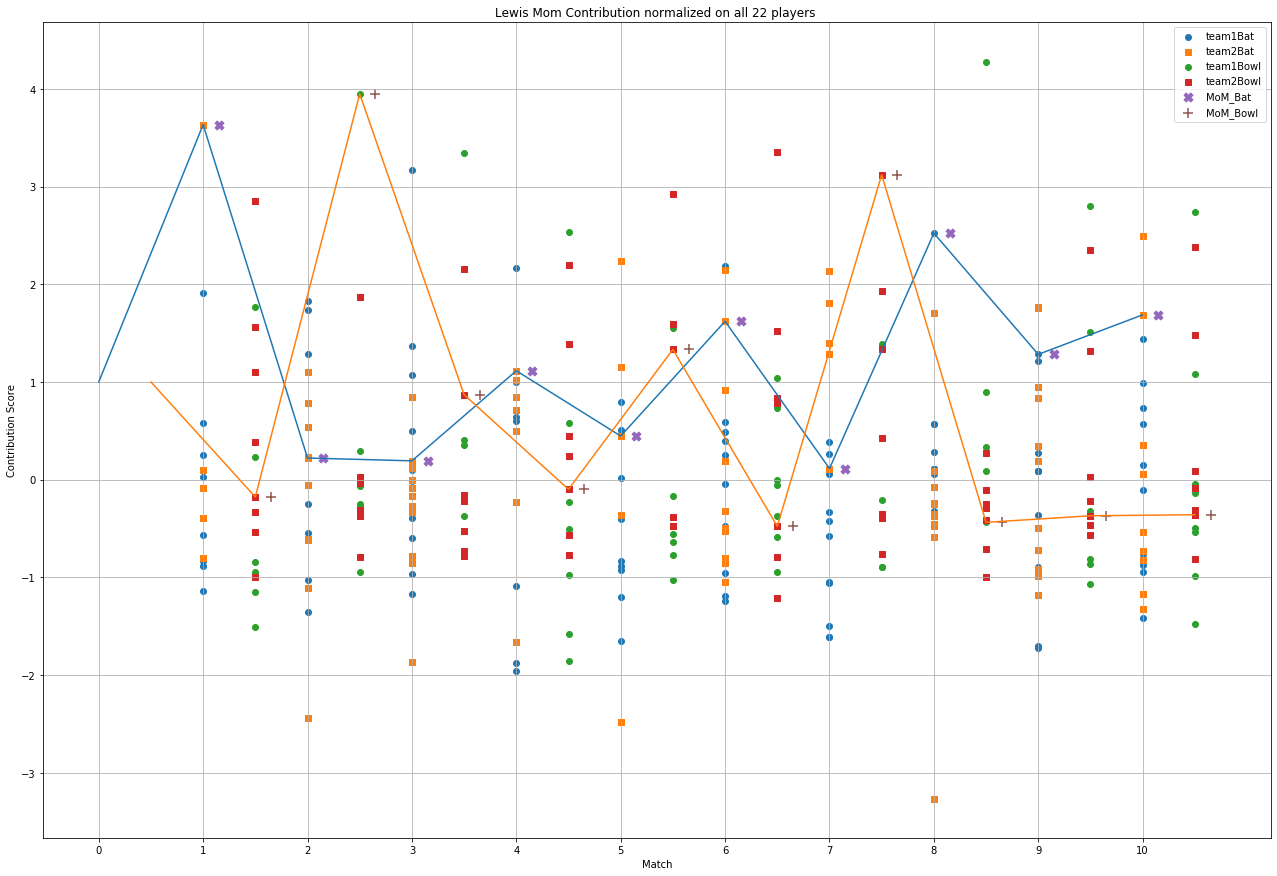

In [357]:
xAxisIndexMat = []
playersBatContLength=[]
teamPlayerIndex=[]
teamBowlPlayerIndex=[]
playersBowlContLength=[]
for i in range(len(allPlayers2BatContributionMatrix)):
    xAxisIndex=[]
    
    playersBatContLength.append(i+1+0.15)
    playersBowlContLength.append(i+1+0.65)
    for j in range(1,23):
        xAxisIndex.append(i+1)
    xAxisIndexMat.append(xAxisIndex)

    
for i in range(len(allPlayers2BatContributionMatrix)):
    xAxisIndex=[]
    xBowlIndex=[]
    for k in range(1,12):
        xAxisIndex.append(i+1)
        xBowlIndex.append(i+1.5) 
        
    teamPlayerIndex.append(xAxisIndex)
    teamBowlPlayerIndex.append(xBowlIndex)

xBowlIndex=[] 
for k in range(-1,10):
        xBowlIndex.append(k+1.5)

yTicks=[] 
xTicks=[]
i=0
while i <=1.07:#for i in range(0,1.05,0.05)
    yTicks.append(i)
    i=i+0.05
i=0    
while i <= len(allPlayers2BatContributionMatrix):#for i in range(0,1.05,0.05)
    xTicks.append(i)
    i=i+1    
#print(xAxisIndexMat)        
    
#plt.scatter(np.ones(len(list(playersContributionNorm.values()))),list(playersContributionNorm.values()))
fig = plt.figure(figsize=(22,15))
#plt.scatter(xAxisIndexMat, allPlayersContributionMatrix)
plt.scatter(teamPlayerIndex, allPlayers1BatContributionMatrix,label="team1Bat")
plt.scatter(teamPlayerIndex, allPlayers2BatContributionMatrix,marker='s', label="team2Bat")


plt.scatter(teamBowlPlayerIndex, allPlayers1BowlContributionMatrix,label="team1Bowl")
plt.scatter(teamBowlPlayerIndex, allPlayers2BowlContributionMatrix,marker='s',label="team2Bowl")


plt.scatter(playersBatContLength,manOfMatchBatContribution, marker="X", s=80, label="MoM_Bat")
plt.scatter(playersBowlContLength,manOfMatchBowlContribution, marker="+", s=90, label="MoM_Bowl")

manOfMatchContribution1 = [1]+ manOfMatchBatContribution
plt.plot(manOfMatchContribution1) #playersContLength,, marker="X

manOfMatchContribution2 = [1]+manOfMatchBowlContribution
plt.plot(xBowlIndex,manOfMatchContribution2) #playersContLength,, marker="X


#plt.yticks(yTicks)#[0,0.05,0.1,0.15,0.5,0.7,0.9,1,1.1])   
plt.xticks(xTicks)
plt.xlabel("Match")
plt.ylabel("Contribution Score")
plt.title("Lewis Mom Contribution normalized on all 22 players ")
plt.grid()
plt.legend()
plt.savefig('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/momPlots/Lewis_mom_plot_'+str(10)+'_20_BatBowSep.pdf')
#plt.show()

## MoM and his team players Contribution

In [42]:

playersContributionDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_current_bowlWt_0.25_wicketWeight_0.75normal_weightedsimKNN_1.csv')
#playerContributionFileNorm = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll_normalized_New.csv','w')

AllmatchesRecord =open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_contribution_diffWith_topCont.csv','w')

AllmatchesRecord.write("match,topContribution,MoMContribution\n")

#Lewis 
#playersContributionDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_LewisContribution_currentAll.csv')
#playerContributionFileNorm = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll_normalized_Lewis.csv','w')


allPlayersContributionMatrix=[]
manOfMatchContribution =[]

manOfMatchTeamContribution =[]


for i in range(len(playersContributionDf)):
    playersContribution={}#.clear()
    playersContributionNorm={}#.clear()
    allPlayers1ContributionRow=[]
    allPlayers2ContributionRow=[]
    momTeamContributionForMatch={}
    avgContribution=0
    stdContribution=0
    team1Players=[]
    team2Players=[]
    #print(playersContributionDf.iloc[0])
    for col in playersContributionDf.columns:
        if col.startswith('player'):
            colId = col.split('_')[-1]
            playerId= playersContributionDf['player_'+str(colId)].iloc[i]
            if int(colId)<12:
                team1Players.append(playerId)
            else:
                team2Players.append(playerId)
            #print(playerId)
            playerContribution = playersContributionDf['cont_'+str(colId)].iloc[i]
            try:
                playersContribution[str(playerId)]= playersContribution[str(playerId)]+  float(playerContribution)
            except KeyError: 
                playersContribution[str(playerId)]= float(playerContribution)
    
    
    
    momId = playersContributionDf['manOfTheMatch'].iloc[i]
    for p in playersContribution.keys():
        if momId in team1Players and int(p) in team1Players:
            
            momTeamContributionForMatch[p] = playersContribution[p]
        elif momId in team2Players and int(p) in team2Players:
             momTeamContributionForMatch[p] = playersContribution[p]
            
      
    
    
    avgContribution  =np.mean(list(momTeamContributionForMatch.values()))
    stdContribution  = np.std(list(momTeamContributionForMatch.values()))
    print("Avg :",avgContribution ,"Std",stdContribution)
    
    playerSeriesCont = dict(sorted(momTeamContributionForMatch.items(), key=operator.itemgetter(1), reverse=True))
    temp = list(playerSeriesCont.items()) 
    print("Top: ", temp[0])
    #res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfSeriesId)] 
    
    print('ManOfMatch from Top Contributor : ', momTeamContributionForMatch[str(playersContributionDf['manOfTheMatch'].iloc[i])] )
    #print(avgContribution, stdContribution)
#     for k in momTeamContributionForMatch.keys():
#         playersContributionNorm[k] = round(((momTeamContributionForMatch[k]-avgContribution)/stdContribution),4)
    
    
    minCont  =np.min(list(momTeamContributionForMatch.values()))
    maxCont  = np.max(list(momTeamContributionForMatch.values()))
    for k in momTeamContributionForMatch.keys():
        playersContributionNorm[k] = round(((momTeamContributionForMatch[k]-minCont)/(maxCont - minCont)),2)
    
    allPlayersContributionMatrix.append(list(playersContributionNorm.values()))
    
        
        
    #print(playersContributionNorm)
    manOfMatchContribution.append(playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
    
    #print(playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
   
        
    
#     ##### Team wise players contribution ###########
#     for p in playersContributionNorm.keys():
#         if int(p) in team1Players:
            
#             allPlayers1ContributionRow.append(playersContributionNorm[p])
#         else:
#             allPlayers2ContributionRow.append(playersContributionNorm[p])
#     allPlayers1ContributionMatrix.append(allPlayers1ContributionRow)
#     allPlayers2ContributionMatrix.append(allPlayers2ContributionRow)
    
    
        
 
    
#     colCount=0
#     for col in playersContributionDf.columns:
#         colCount= colCount + 1
#         if colCount < 9:
#             playerContributionFileNorm.write(str(playersContributionDf[col].iloc[i])+',')
#         if col.startswith('player'):
#             colId = col.split('_')[-1]
#             playerId= playersContributionDf['player_'+str(colId)].iloc[i]
#             playerContributionFileNorm.write(str(playerId)+',')
#             playerContributionFileNorm.write(str(playersContributionNorm[str(playerId)])+',')
    
    AllmatchesRecord.write(str(playersContributionDf['matchId'].iloc[i])+",")
    AllmatchesRecord.write(str(np.max(list(playersContributionNorm.values())))+",")
    AllmatchesRecord.write(str(playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])+"\n")
    
    #playerContributionFileNorm.write('Match Id',playersContributionDf['matchId'].iloc[i], 'Max ', np.max(list(playersContributionNorm.values())),' Mom ', playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
    #playerContributionFileNorm.write("\n")
    print('Match Id',playersContributionDf['matchId'].iloc[i], 'Max ', np.max(list(playersContributionNorm.values())),' Mom ', playersContributionNorm[str(playersContributionDf['manOfTheMatch'].iloc[i])])
AllmatchesRecord.close()            
#playerContributionFileNorm.close()                 
            
                    

Avg : 3.324545454545454 Std 25.282587023711994
Top:  ('230193', 68.14)
ManOfMatch from Top Contributor :  68.14
Match Id 1000887 Max  1.0  Mom  1.0
Avg : 3.8881818181818186 Std 10.317918939382565
Top:  ('267192', 27.45)
ManOfMatch from Top Contributor :  27.45
Match Id 1000891 Max  1.0  Mom  1.0
Avg : 8.04090909090909 Std 15.290988703716646
Top:  ('219889', 45.07)
ManOfMatch from Top Contributor :  45.07
Match Id 1000893 Max  1.0  Mom  1.0
Avg : 3.9554545454545473 Std 23.290705662300873
Top:  ('267192', 70.51)
ManOfMatch from Top Contributor :  70.51
Match Id 1001371 Max  1.0  Mom  1.0
Avg : 2.5218181818181815 Std 29.802890591405827
Top:  ('219889', 86.71)
ManOfMatch from Top Contributor :  86.71
Match Id 1001375 Max  1.0  Mom  1.0
Avg : 4.154545454545453 Std 38.37991836734801
Top:  ('325012', 120.48)
ManOfMatch from Top Contributor :  120.48
Match Id 1020013 Max  1.0  Mom  1.0
Avg : 1.8036363636363637 Std 18.48583795662717
Top:  ('38699', 41.24)
ManOfMatch from Top Contributor :  26.7

Match Id 1120287 Max  1.0  Mom  0.71
Avg : 1.9336363636363636 Std 7.899624010301518
Top:  ('681305', 19.75)
ManOfMatch from Top Contributor :  3.99
Match Id 1120288 Max  1.0  Mom  0.51
Avg : 3.463636363636363 Std 8.91576568141797
Top:  ('559235', 17.25)
ManOfMatch from Top Contributor :  12.07
Match Id 1122279 Max  1.0  Mom  0.8
Avg : 6.905454545454546 Std 24.05427021762413
Top:  ('253802', 59.56)
ManOfMatch from Top Contributor :  59.56
Match Id 1122281 Max  1.0  Mom  1.0
Avg : 1.7363636363636366 Std 10.826300696768934
Top:  ('34102', 23.96)
ManOfMatch from Top Contributor :  23.96
Match Id 1122283 Max  1.0  Mom  1.0
Avg : 6.699090909090909 Std 14.911576622053481
Top:  ('253802', 48.84)
ManOfMatch from Top Contributor :  48.84
Match Id 1122284 Max  1.0  Mom  1.0
Avg : 6.237272727272727 Std 15.071400424107962
Top:  ('28235', 39.79)
ManOfMatch from Top Contributor :  18.25
Match Id 1122728 Max  1.0  Mom  0.62
Avg : 4.28 Std 12.396880839366592
Top:  ('379143', 26.55)
ManOfMatch from Top 

Avg : 6.383636363636364 Std 14.843806956393555
Top:  ('267192', 43.28)
ManOfMatch from Top Contributor :  43.28
Match Id 656493 Max  1.0  Mom  1.0
Avg : 4.3945454545454545 Std 9.93470991811159
Top:  ('6033', 26.5)
ManOfMatch from Top Contributor :  11.0
Match Id 656495 Max  1.0  Mom  0.58
Avg : 3.6409090909090907 Std 17.456542120646844
Top:  ('276298', 42.39)
ManOfMatch from Top Contributor :  42.39
Match Id 722345 Max  1.0  Mom  1.0
Avg : 4.9781818181818185 Std 14.814044207613396
Top:  ('277906', 36.07)
ManOfMatch from Top Contributor :  36.07
Match Id 743947 Max  1.0  Mom  1.0
Avg : 5.542727272727273 Std 9.609291044617459
Top:  ('230193', 31.66)
ManOfMatch from Top Contributor :  31.66
Match Id 743977 Max  1.0  Mom  1.0
Avg : 4.730909090909091 Std 14.20227347648349
Top:  ('272450', 23.96)
ManOfMatch from Top Contributor :  23.96
Match Id 743979 Max  1.0  Mom  1.0
Avg : 3.5654545454545454 Std 13.06692449287434
Top:  ('298438', 28.61)
ManOfMatch from Top Contributor :  13.16
Match Id 7

In [43]:


AllmatchesRecord =pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_contribution_diffWith_topCont.csv')

AllmatchesRecord["AbsDiff"] =0
AllmatchesRecord["AbsDiff"] = abs (AllmatchesRecord['topContribution']- AllmatchesRecord['MoMContribution'])

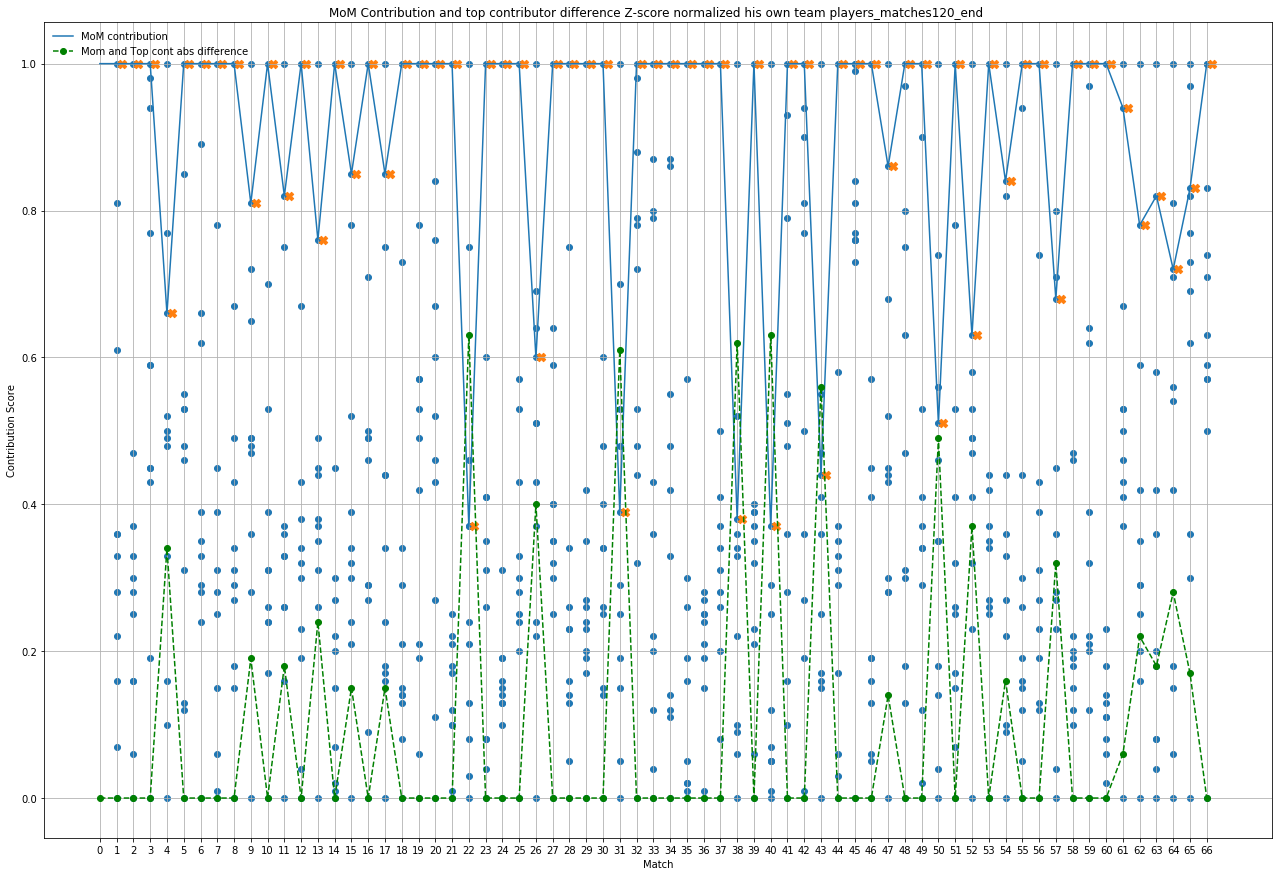

In [41]:
xAxisIndexMat = []
playersContLength=[]
teamPlayerIndex=[]
for i in range(len(allPlayersContributionMatrix)):
    xAxisIndex=[]
    
    playersContLength.append(i+1+0.30)
    for j in range(1,12):
        xAxisIndex.append(i+1)
    xAxisIndexMat.append(xAxisIndex)

    
for i in range(len(allPlayersContributionMatrix)):
    xAxisIndex=[]
    for k in range(1,12):
         xAxisIndex.append(i+1)
    teamPlayerIndex.append(xAxisIndex)
    
yTicks=[] 
xTicks=[]
i=0
while i <=1.07:#for i in range(0,1.05,0.05)
    yTicks.append(i)
    i=i+0.05
i=0    
while i <= len(allPlayersContributionMatrix):#for i in range(0,1.05,0.05)
    xTicks.append(i)
    i=i+1    
#print(xAxisIndexMat)        
    
#plt.scatter(np.ones(len(list(playersContributionNorm.values()))),list(playersContributionNorm.values()))
fig = plt.figure(figsize=(22,15))
#print(len(allPlayersContributionMatrix))
plt.scatter(teamPlayerIndex, allPlayersContributionMatrix)


#plt.scatter(teamPlayerIndex, manOfMatchTeamContribution)
#plt.scatter(teamPlayerIndex, allPlayers1ContributionMatrix,marker='s')

plt.scatter(playersContLength,manOfMatchContribution, marker="X", s=70)
manOfMatchContribution1 = [1]+ manOfMatchContribution
plt.plot(manOfMatchContribution1,label='MoM contribution') #playersContLength,, marker="X
contributionDiff = [0]+ list(AllmatchesRecord['AbsDiff'])
plt.plot(contributionDiff, color='green', marker='o', linestyle='dashed',label="Mom and Top cont abs difference" )

#plt.yticks(yTicks)#[0,0.05,0.1,0.15,0.5,0.7,0.9,1,1.1])   
plt.xticks(xTicks)
plt.xlabel("Match")
plt.ylabel("Contribution Score")
plt.title("MoM Contribution and top contributor difference Z-score normalized his own team players_matches120_end ")

plt.legend(frameon=False, loc='upper left')
plt.grid()
plt.savefig('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/momPlots/MoM_contDifference_TopCont_MinMaxscoreNorm_OwnTeam_matches'+str(120)+'_end.png')
#plt.show()

In [38]:
momDf = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll.csv')

playerData = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/All_Players.csv')


In [40]:
playerMoMdata = momDf.merge(playerData,left_on='manOfTheMatch', right_on='player_id')
playerMoMdata.head(1)

,matchId,manOfTheMatch,momName,team1,team2,year,winnerTeam,matchFound,player_1,cont_1,...,bowling_hand,name,batting_style,age_years,bowling_style,batting_style_long,player_primary_role,bowling_pacespin,team,bowling_style_long
0,1000887,230193,Matthew Wade,Australia,Pakistan,2017,Australia,1,219889,-18.0,...,right-arm bowler,Matthew Wade,lhb,25,rm,left-hand bat,wicketkeeper batsman,pace bowler,Australia,right-arm medium


In [41]:
playerMoMdata.drop(['batting_hand','batting_style','age_years','bowling_style','batting_style_long','bowling_pacespin'],axis=1)

,matchId,manOfTheMatch,momName,team1,team2,year,winnerTeam,matchFound,player_1,cont_1,...,cont_21,player_22,cont_22,momPos,player_id,bowling_hand,name,player_primary_role,team,bowling_style_long
0,1000887,230193,Matthew Wade,Australia,Pakistan,2017,Australia,1,219889,-18.00,...,-29.20,681305,-4.43,0,230193,right-arm bowler,Matthew Wade,wicketkeeper batsman,Australia,right-arm medium
1,1000889,41434,Mohammad Hafeez,Australia,Pakistan,2017,Pakistan,1,215155,-9.60,...,3.64,259551,17.22,9,41434,right-arm bowler,Mohammad Hafeez,allrounder,Pakistan,right-arm offbreak
2,657637,41434,Mohammad Hafeez,Pakistan,Sri Lanka,2013,Pakistan,1,227762,24.60,...,-5.08,49619,-2.99,3,41434,right-arm bowler,Mohammad Hafeez,allrounder,Pakistan,right-arm offbreak
3,860269,41434,Mohammad Hafeez,Sri Lanka,Pakistan,2015,Pakistan,1,300631,2.30,...,-5.88,429981,-1.26,0,41434,right-arm bowler,Mohammad Hafeez,allrounder,Pakistan,right-arm offbreak
4,1000891,267192,Steven Smith,Pakistan,Australia,2017,Australia,1,41434,-11.62,...,18.48,533042,-7.70,0,267192,right-arm bowler,Steven Smith,allrounder,Australia,legbreak googly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,667897,301236,Lahiru Thirimanne,England,Sri Lanka,2014,Sri Lanka,1,11728,-4.80,...,4.97,49758,7.42,6,301236,right-arm bowler,Lahiru Thirimanne,top-order batsman,Sri Lanka,right-arm medium-fast
163,754759,297635,James Taylor,India,England,2015,England,1,277916,12.10,...,8.40,210283,8.54,1,297635,right-arm bowler,James Taylor,middle-order batsman,England,legbreak
164,860277,300631,Kusal Perera,Sri Lanka,Pakistan,2015,Sri Lanka,1,300631,53.70,...,-35.96,429981,-15.54,0,300631,unknown arm,Kusal Perera,wicketkeeper batsman,Sri Lanka,NaN
165,936161,44828,Faf du Plessis,South Africa,Sri Lanka,2017,South Africa,1,43906,-2.10,...,-9.59,429738,-27.02,2,44828,right-arm bowler,Faf du Plessis,middle-order batsman,South Africa,legbreak


In [43]:
playerMoMdata.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/manOfTheMatch_predicted_currentAll_withPlayerRoles.csv',index=False)


In [33]:
playerMoMdata['player_primary_role'].unique()

array([nan, 'top-order batsman', 'opening batsman',
       'wicketkeeper batsman', 'bowler', 'allrounder',
       'middle-order batsman', 'batsman', 'batting allrounder',
       'bowling allrounder', 'wicketkeeper', 'Bowler'], dtype=object)

In [44]:
for role in playerMoMdata['player_primary_role'].unique():
    print('Player Role,  ', role,',',len(playerMoMdata[(playerMoMdata['player_primary_role']==role)]))
   

Player Role,   wicketkeeper batsman , 16
Player Role,   allrounder , 26
Player Role,   opening batsman , 12
Player Role,   middle-order batsman , 31
Player Role,   bowler , 34
Player Role,   top-order batsman , 27
Player Role,   batting allrounder , 5
Player Role,   bowling allrounder , 3
Player Role,   batsman , 9
Player Role,   nan , 0
Player Role,   wicketkeeper , 1


In [ ]:
#playerMoMdata[(playerMoMdata['player_primary_role']=='top-order batsman') | (playerMoMdata['player_primary_role']=='allrounder')]

In [304]:
#manOfMatchRecords  = pd.read_csv('F:/LUMS/Cricket Data/manOfTheMatch_ODI_2003_15.csv')

#manOfMatchRecords  = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/ICC_worldcup2019_MoM_Details.csv')

manOfMatchRecords  = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/allMatches_MoM_Details.csv')


# manOfMatchAccuracyFile = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_Accuracy_WithWeights_temp.csv','w')
# manOfMatchAccuracyFile.write('matchCount,pos0in11,pos1in11,posin11Mean,pos0in22,pos1in22,posin22Mean,wicketWeight,bowlWeight\n')



wicketsWeight = [1]#0,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.70,0.8,0.9]
bowlingContWeight = [0.5]#[0,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]



# matchIds =[423793,426428,446957,455234,467886,461569,439151,578625,65662,256614,430887,520601,64859,64861,578618,350046,433596,433564,239917,902643,238198,489217,667649,65638,249213,291365,518965,446968,
#           211425,430889,860277,257771,319134,249748,433586,343732,514026,489224,65642,667897,656437,
#           386534,636162,567358,293078,249752,597925,474469,860269,415282,461569]
# #226375,


matchSummariesLocation= 'C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/worldCup19/'

list_of_files = os.listdir(matchSummariesLocation)




#matchIds =[1072310,1072311,1072312,1072313,1072314]
inningsDataComplete = pd.read_csv(str(matchinProgressDataFolder)+'innings1/inprogress_Inng1_over1_50Records_2001_19_withBeforeOverInfo.csv')  

playerData = pd.read_csv('C:/Users/naima/Google Drive/Cricket Data/Naimat Ullah/Data Files/All_Players.csv')

match=0
errorMatches=[]
palyersAndContributions = {}    
#for fileName in list_of_files: 
matchRecord = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/matchFilesHereIds_contributionGeneratedNew.csv')  

for bowlWeight in bowlingContWeight:
    for wicktWt in wicketsWeight:
        
        manOfMatchPredDataFile = open('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_current_bowlWt_'+str(bowlWeight)+'_wicketWeight_'+str(wicktWt)+'BatBowl.csv','w')
        manOfMatchPredDataFile.write('matchId,manOfTheMatch,momName,team1,team2,year,winnerTeam,')


        manOfMatchPredDataFile.write('momPosInTeam,')
        manOfMatchPredDataFile.write('momPosInAll,')
        for i in range(1,23):
            manOfMatchPredDataFile.write('player_'+str(i)+','+'batcont_'+str(i)+','+'bowlcont_'+str(i)+',')
        manOfMatchPredDataFile.write('\n')    




        for matID in matchRecord['matchId']: #range(1):#fileName in list_of_files:  
            #fileName='65642_Australia_England_2_2003.json'
            #lastVal = fileName.split('_')[3]
            matchId= matID #['65642'] #lastVal.split('.')[0]

            #print('MatchId ',matchId)
            match= match+1


        #for match in range(len(manOfMatchRecords)):#len(manOfMatchRecords)):
            try:
                if  manOfMatchRecords[manOfMatchRecords['match_id']==int(matchId)]['year'].iloc[0]>=2015: # 1==1:#matchId!=1022361:#if (manOfMatchRecords['mom_id'].iloc[match]!='index' and  manOfMatchRecords['match_id'].iloc[match]< 1144513) :#  try: # 
                    if(match%2==0):
                        print('Done', match)
                    team1Winner=True


                    currMatchId =  int(matchId)# manOfMatchRecords['match_id'].iloc[match] # matchIds[match]#238189 # 237568# 247505 int(len(manOfMatchRecords)
                    manOfMatch = manOfMatchRecords[manOfMatchRecords['match_id']==currMatchId]['mom_id'].iloc[0]   #33335 # 36185# 49289 # manOfMatchRecords['mom_id'].iloc[match]
                    inningsDataCompleteCurrMatch = inningsDataComplete[inningsDataComplete['matchId']==currMatchId].iloc[0]


                    print('currMatchId',currMatchId,'manOfMatch',manOfMatch)

                    team1Players,team1battingContribution,team2Players,team2bolwingContribution  = findContributionForTeambyProjectionfromFile(int(currMatchId),1,wicktWt) # findContributionForTeam(int(currMatchId),1)

                    team2Players,team2battingContribution,team1Players,team1bolwingContribution   = findContributionForTeambyProjectionfromFile(int(currMatchId),2,wicktWt) #findContributionForTeam(int(currMatchId),2)


                    manOfMatchPredDataFile.write(str(currMatchId)+',')
                    manOfMatchPredDataFile.write(str(manOfMatch)+',')

                    manOfMatchPredDataFile.write(str(manOfMatchRecords[manOfMatchRecords['match_id']==currMatchId]['mom_name'].iloc[0] )+',')


                    palyersAndContributionsInMatch1 = {} 
                    palyersAndContributionsInMatch2 = {}

                    print(inningsDataCompleteCurrMatch['team1'])
                    manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team1'])+',')
                    manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team2'])+',')
                    manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['year'])+',')


                    if(int(inningsDataCompleteCurrMatch['inning1Runs'])>  int(inningsDataCompleteCurrMatch['inning2Runs'])):
                        manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team1'])+',')
                        team1Winner=True
                    else:
                        manOfMatchPredDataFile.write(str(inningsDataCompleteCurrMatch['team2'])+',')
                        team1Winner=False

                    #print(playerData[playerData['player_id']==manOfMatch]['name'].iloc[0])
                    #manOfMatchPredDataFile.write(str( playerData[playerData['player_id']==manOfMatch]['name'].iloc[0])+',')
                    #manOfMatchPredDataFile.write(str( playerData[playerData['player_id']==manOfMatch]['team'].iloc[0])+',')
                    #manOfMatchPredDataFile.write(str( playerData[playerData['player_id']==manOfMatch]['player_primary_role'].iloc[0])+',')


                    #manOfMatchPredDataFile.write(str(currMatchId)+',')

                    team1NetContribution = np.zeros(11)
                    team2NetContribution = np.zeros(11)

            #         print("Bat Contribution: ",team1battingContribution )
            #         print("Bowl Contribution: ",team1bolwingContribution )
                    #palyersAndContributions['c1']=10

                    for i in range(len(team1Players)):
                        team1NetContribution[i] = team1battingContribution[i] +team1bolwingContribution[i]
                        playerId=team1Players[i]
                        try:#if str(playerId) in palyersAndContributions:         
                            palyersAndContributions[str(playerId)]=(palyersAndContributions[str(team1Players[i])]+  team1NetContribution[i])
                            palyersAndContributionsInMatch1[str(playerId)]=(palyersAndContributionsInMatch1[str(team1Players[i])]+  team1NetContribution[i])

                        except  KeyError: #else:
                            palyersAndContributions[str(playerId)]= team1NetContribution[i]
                            palyersAndContributionsInMatch1[str(playerId)]= team1NetContribution[i]


                    for i in range(len(team2Players)):
                        team2NetContribution[i]= team2battingContribution[i] + team2bolwingContribution[i]
                        playerId=team2Players[i]
                        try:#if str(playerId) in palyersAndContributions:         
                            palyersAndContributions[str(playerId)]=(palyersAndContributions[str(team2Players[i])]+  team2NetContribution[i])
                            palyersAndContributionsInMatch2[str(playerId)]=(palyersAndContributionsInMatch2[str(team2Players[i])]+  team2NetContribution[i])

                        except  KeyError: #else:
                            palyersAndContributions[str(playerId)]= team2NetContribution[i]
                            palyersAndContributionsInMatch2[str(playerId)]= team2NetContribution[i]


                    allPlayersContribution = {**palyersAndContributionsInMatch1 , **palyersAndContributionsInMatch2}

                    sorted_palyersAllPlayersContribution={}
                    sorted_palyersAllPlayersContribution = dict(sorted(allPlayersContribution.items(), key=operator.itemgetter(1),reverse=True))
                    #print("All 22", sorted_palyersAllPlayersContribution)
                    #print("\n")
                    #print("team2:",team2Players )
                    #print("Net Contribution: ",team2NetContribution )
                    sorted_palyersAndContributionsInMatch1 ={}
                    sorted_palyersAndContributionsInMatch1 = dict(sorted(palyersAndContributionsInMatch1.items(), key=operator.itemgetter(1), reverse=True))
                    #print("Match Contribution team", sorted_palyersAndContributionsInMatch1)

                    sorted_palyersAndContributionsInMatch2={}
                    sorted_palyersAndContributionsInMatch2 = dict(sorted(palyersAndContributionsInMatch2.items(), key=operator.itemgetter(1),reverse=True))
                    #print("Match Contribution team", sorted_palyersAndContributionsInMatch2)


                    if(team1Players==0 or team2Players==0):
                        manOfMatchPredDataFile.write('0,')
                        #manOfMatchPredDataFile.write('-1\n')

                    else:


                        highestRaterTeam1 = team1Players[list(team1NetContribution).index(team1NetContribution.max())]
                        highestRaterTeam2 = team2Players[list(team2NetContribution).index(team2NetContribution.max())]


                        #team1PlayersContributionSorted = team1PlayersContribution#.sort()
                        team1PlayersContributionSorted= -np.sort(-team1NetContribution)
                        team2PlayersContributionSorted= -np.sort(-team2NetContribution)

                        #manOfMatchPredDataFile.write('1,')


                        #print('team1Highest',team1Players[list(team1NetContribution).index(team1NetContribution.max())])
                        #print('team2Highest',team2Players[list(team2NetContribution).index(team2NetContribution.max())])


                         #print('man of Match',manOfMatch)
                        momContri=0
                        if(int(manOfMatch) in team1Players):

                            temp = list(sorted_palyersAndContributionsInMatch1.items())  
                            res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)]

                            manOfMatchPosteam1 = res[0]
                            #manOfMatchPosteam1 = list(team1PlayersContributionSorted).index(team1NetContribution[list(team1Players).index(manOfMatch)])

                            print("manOfMatchPosteam1:",manOfMatchPosteam1)
                            manOfMatchPredDataFile.write(str(manOfMatchPosteam1)+',')

                        else:
                            temp = list(sorted_palyersAndContributionsInMatch2.items())  
                            res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)] 
                            manOfMatchPosteam2 = res[0] #list(team2PlayersContributionSorted).index(momContri)

                            #manOfMatchPosteam2 = list(team2PlayersContributionSorted).index(team2NetContribution[list(team2Players).index(manOfMatch)])
                            print("manOfMatchPosteam2:",manOfMatchPosteam2)
                            manOfMatchPredDataFile.write(str(manOfMatchPosteam2)+',')


                        temp = list(sorted_palyersAllPlayersContribution.items())  
                        res = [idx for idx, key in enumerate(temp) if key[0] == str(manOfMatch)] 
                        print("Postition in All 22 Players", res[0])
                        momPositionAll = res[0]
                        manOfMatchPredDataFile.write(str(momPositionAll)+',')

                        for k in range(len(team1Players)):
                            #print(playerId)
                            playerId = team1Players[k]  #[list(team1NetContribution).index(team1PlayersContributionSorted[k])]
                            try:
                                manOfMatchPredDataFile.write(str(playerId)+',')
                                #str(playerData[playerData['player_id']==playerId]['name'].iloc[0])+',')
                            except:
                                manOfMatchPredDataFile.write('nameNotFound,')
                            manOfMatchPredDataFile.write(str(round(team1battingContribution[k],2))+',')    
                            manOfMatchPredDataFile.write(str(round(team1bolwingContribution[k],2))+',')


                        for k in range(len(team2Players)):
                            playerId = team2Players[k]# [list(team2NetContribution).index(team2PlayersContributionSorted[k])]
                            try:
                                manOfMatchPredDataFile.write(str(playerId)+',')
                                #str(playerData[playerData['player_id']==playerId]['name'].iloc[0])+',')
                                #manOfMatchPredDataFile.write(str(playerData[playerData['player_id']==playerId]['name'].iloc[0])+',')
                            except:
                                manOfMatchPredDataFile.write('nameNotFound,')

                            
                            manOfMatchPredDataFile.write(str(round(team2battingContribution[k],2))+',')    
                            manOfMatchPredDataFile.write(str(round(team2bolwingContribution[k],2))+',')
                        manOfMatchPredDataFile.write('\n')



            except:
                errorMatches.append(matchId)
                print('some error')


        manOfMatchPredDataFile.close()
#         thisWeightsFile = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/Results/manOfMatch/after28Feb/manOfTheMatch_predicted_current_bowlWt_'+str(bowlWeight)+'_wicketWeight_'+str(wicktWt)+'.csv')

#         manOfMatchAccuracyFile.write(str(len(thisWeightsFile))+',')
#         manOfMatchAccuracyFile.write(str(len(thisWeightsFile[thisWeightsFile['momPosInTeam']==0]))+',')
#         manOfMatchAccuracyFile.write(str(len(thisWeightsFile[thisWeightsFile['momPosInTeam']==1])+ len(thisWeightsFile[thisWeightsFile['momPosInTeam']==0]))+',')
#         manOfMatchAccuracyFile.write(str(thisWeightsFile['momPosInTeam'].mean())+',')
#         manOfMatchAccuracyFile.write(str(len(thisWeightsFile[thisWeightsFile['momPosInAll']==0]))+',')
#         manOfMatchAccuracyFile.write(str(len(thisWeightsFile[thisWeightsFile['momPosInAll']==1])+len(thisWeightsFile[thisWeightsFile['momPosInAll']==0]))+',')
#         manOfMatchAccuracyFile.write(str(thisWeightsFile['momPosInAll'].mean())+',')
#         manOfMatchAccuracyFile.write(str(wicktWt)+',')
#         manOfMatchAccuracyFile.write(str( bowlWeight)+'\n')
#manOfMatchAccuracyFile.close()

#     print("Wicket wights :   ", bowlWeight)
#     print("Total matches:: ", len(thisWeightsFile))
#     print("Postion 0 :: ", len(thisWeightsFile[thisWeightsFile['momPosInTeam']==0]))
#     print("Postion 1 ::", len(thisWeightsFile[thisWeightsFile['momPosInTeam']==1]))
#     print("Postions Mean ::", thisWeightsFile['momPosInTeam'].mean())


#     print("All Postion 0 ::", len(thisWeightsFile[thisWeightsFile['momPosInAll']==0]))
#     print("All Postion 1 :: ", len(thisWeightsFile[thisWeightsFile['momPosInAll']==1]))
#     print("all Postions Mean:: ", thisWeightsFile['momPosInAll'].mean())


    



currMatchId 1000887 manOfMatch 230193
Australia
manOfMatchPosteam1: 1
Postition in All 22 Players 2
Done 2
currMatchId 1000889 manOfMatch 41434
Australia
manOfMatchPosteam2: 9
Postition in All 22 Players 17
currMatchId 1000891 manOfMatch 267192
Pakistan
manOfMatchPosteam2: 1
Postition in All 22 Players 1
Done 4
currMatchId 1000893 manOfMatch 219889
Australia
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1001371 manOfMatch 267192
Australia
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 6
currMatchId 1001375 manOfMatch 219889
Australia
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 1020013 manOfMatch 325012
New Zealand
manOfMatchPosteam2: 0
Postition in All 22 Players 0
Done 8
currMatchId 1020017 manOfMatch 277912
New Zealand
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1020031 manOfMatch 379143
New Zealand
manOfMatchPosteam2: 2
Postition in All 22 Players 3
Done 10
currMatchId 1020033 manOfMatch 38699
New Zealand
manOfMatch

Sri Lanka
manOfMatchPosteam2: 2
Postition in All 22 Players 3
Done 84
currMatchId 1142586 manOfMatch 269280
some error
currMatchId 1144156 manOfMatch 41434
South Africa
manOfMatchPosteam2: 1
Postition in All 22 Players 1
Done 86
currMatchId 1144157 manOfMatch 540316
Pakistan
manOfMatchPosteam2: 0
Postition in All 22 Players 0
currMatchId 1144159 manOfMatch 697279
South Africa
manOfMatchPosteam2: 0
Postition in All 22 Players 1
Done 88
currMatchId 1144160 manOfMatch 379143
Pakistan
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 1144167 manOfMatch 44828
Sri Lanka
manOfMatchPosteam2: 2
Postition in All 22 Players 2
Done 90
currMatchId 1144168 manOfMatch 379143
South Africa
manOfMatchPosteam1: 2
Postition in All 22 Players 3
currMatchId 1144170 manOfMatch 328026
Sri Lanka
manOfMatchPosteam1: 1
Postition in All 22 Players 4
Done 92
currMatchId 1144483 manOfMatch 311158
England
manOfMatchPosteam1: 0
Postition in All 22 Players 0
currMatchId 1144490 manOfMatch 34102
South Afr

India
manOfMatchPosteam2: 1
Postition in All 22 Players 1
currMatchId 754755 manOfMatch 267192
England
manOfMatchPosteam2: 0
Postition in All 22 Players 1
Done 240
currMatchId 754759 manOfMatch 297635
India
manOfMatchPosteam2: 5
Postition in All 22 Players 6
currMatchId 754761 manOfMatch 325026
Australia
manOfMatchPosteam1: 1
Postition in All 22 Players 1
currMatchId 800471 manOfMatch 249866
South Africa
manOfMatchPosteam2: 3
Postition in All 22 Players 5
Done 250
currMatchId 800473 manOfMatch 379143
England
manOfMatchPosteam2: 1
Postition in All 22 Players 4
currMatchId 800475 manOfMatch 439952
England
manOfMatchPosteam2: 3
Postition in All 22 Players 6
Done 252
currMatchId 800477 manOfMatch 44936
England
manOfMatchPosteam2: 3
Postition in All 22 Players 5
currMatchId 848843 manOfMatch 43906
South Africa
manOfMatchPosteam1: 0
Postition in All 22 Players 0
Done 254
currMatchId 848845 manOfMatch 226492
South Africa
manOfMatchPosteam2: 2
Postition in All 22 Players 2
currMatchId 848847 m

In [302]:


#################   Contribution measuring from expectedRuns of an over ############

#inningFeatureVectorCompletePlayerId = pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/Results/inprogressOfInning_matchId_'+str(currMatch)+'_'+str(inngs)+'_LR_targetVar_totalRunsScoredCurrentOvr.csv')  


def findContributionForTeambyProjectionfromFile(currMatchId,inningsId,wicketWt):
    
    teamBattingContribution={}
    inningFeatureVectorCompletePlayerId = pd.read_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/finalContributionFiles/contribution_inngs'+str(inningsId)+'_match_'+str(currMatchId)+'.csv')  
    
    matchLength = len(inningFeatureVectorCompletePlayerId)
    #print('len I am here', len(inningFeatureVectorCompletePlayerId))
    inningFeatureVectorCompletePlayerId['expectedRunsforThisOver']=0

    
    expectedRunsOver=0
        
    for i in range(len(inningFeatureVectorCompletePlayerId)):
        k=i
        if(i==(len(inningFeatureVectorCompletePlayerId)-1)):
            expectedRunsOver  = (inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i])
        else:
             expectedRunsOver = (inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i]- inningFeatureVectorCompletePlayerId['runPredicted'].iloc[i+1])
        #print('k',k) 
        #print('expectedRunsOver',expectedRunsOver)
        inningFeatureVectorCompletePlayerId['expectedRunsforThisOver'].loc[i] =  expectedRunsOver  
            
    
    
    inningFeatureVectorCompletePlayerId['bats1Contribution']=0
    inningFeatureVectorCompletePlayerId['bats2Contribution']=0


    battingPlayers=[]
    bowlingPlayers=[]
    #=[]

    wicketWeight= wicketWt #0.65
    battingTeamContribution= np.zeros(11)
    bowlingTeamContribution= np.zeros(11)

    for k in range(1):
        for col in inningFeatureVectorCompletePlayerId.columns:
            if col.startswith('batsman'):
                battingPlayers.append(inningFeatureVectorCompletePlayerId[col].iloc[k])
            if col.startswith('bowler'):
                bowlingPlayers.append(inningFeatureVectorCompletePlayerId[col].iloc[k])

    #print('team',battingPlayers)

    runsForThisOver=0
    for i in range(len(inningFeatureVectorCompletePlayerId)):

        expectedRunsOver  = (inningFeatureVectorCompletePlayerId['expectedRunsforThisOver'].iloc[i])
        runsScoredinOvr =  (inningFeatureVectorCompletePlayerId['totalRunsScoredCurrentOvr'].iloc[i])
        bowlContribution = expectedRunsOver - runsScoredinOvr
        expectedRunsOverActual=expectedRunsOver
        wicketCountInOvr=0
        for col in inningFeatureVectorCompletePlayerId.columns:       ## Remove batsman Cluster ids columns
            
            if col.startswith('wicket'):
                if((math.isnan(inningFeatureVectorCompletePlayerId[col].iloc[i]))==False):
                    #wicketWeight=0.55
#                     if(inningFeatureVectorCompletePlayerId['overId'].iloc[i]<10):
#                             wicketWeight= 0.70
                    wicketCountInOvr= wicketCountInOvr+1
#                     if(wicketCountInOvr>1):
#                         wicketWeight=wicketWeight+0.1
                    playerIndex = battingPlayers.index((inningFeatureVectorCompletePlayerId[col].iloc[i]))
                    battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ int(expectedRunsOver*(wicketWeight)*(-1))
                    
                    playerIndex = bowlingPlayers.index((inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i]))
        
                    bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex]+ int(expectedRunsOver*(wicketWeight))

            
            
                    expectedRunsOver = int(expectedRunsOver*(1-wicketWeight))


        expectedRunsBall = round(expectedRunsOver/6 ,1)  
        expectedRunsForBatsman1 = (inningFeatureVectorCompletePlayerId['bats1CurrOvrBalls'].iloc[i]*expectedRunsBall)
        expectedRunsForBatsman2 = (inningFeatureVectorCompletePlayerId['bats2CurrOvrBalls'].iloc[i]*expectedRunsBall)
        batsman1Contribution = (inningFeatureVectorCompletePlayerId['bats1CurrOvrRuns'].iloc[i] -  expectedRunsForBatsman1)
        batsman2Contribution = (inningFeatureVectorCompletePlayerId['bats2CurrOvrRuns'].iloc[i] - expectedRunsForBatsman2)

        inningFeatureVectorCompletePlayerId['bats1Contribution'].loc[i]=  batsman1Contribution
        inningFeatureVectorCompletePlayerId['bats2Contribution'].loc[i]=  batsman2Contribution


        #####   bolwers contribution ####
        
        
        
        playerIndex = bowlingPlayers.index((inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i]))
        
        bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex]+ int(bowlContribution)#expectedRunsOver*(wicketWeight))


#         playerIndex = bowlingPlayers.index(inningFeatureVectorCompletePlayerId['onCreasebowlerOfTheOvr'].iloc[i])
#         bowlingTeamContribution[playerIndex] = bowlingTeamContribution[playerIndex] +(-* batsman1Contribution) - batsman2Contribution


        #####   batsmen contribution #####
        playerIndex = battingPlayers.index(int(inningFeatureVectorCompletePlayerId['onCreasebatsman1'].iloc[i]))
        battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ batsman1Contribution
        playerIndex = battingPlayers.index(inningFeatureVectorCompletePlayerId['onCreasebatsman2'].iloc[i])
        battingTeamContribution[playerIndex] = battingTeamContribution[playerIndex]+ batsman2Contribution

            
    #print('Here in contribution')
    inningFeatureVectorCompletePlayerId.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/contribution/withContributionColsNew/contribution_inngs'+str(inningsId)+'_match_'+str(currMatchId)+'.csv', index=False)
       
    #(str(matchinProgressDataFolder)+'Results/inprogressOfInning_matchId_'+str(currMatchId)+'_'+str(inningsId)+'_LR__targetVar_PrjectedScore_allOvers_Contribution.csv', index=False)  
    return battingPlayers,battingTeamContribution,bowlingPlayers,bowlingTeamContribution
    


In [379]:

inngs=2

inningStartFeatureVector = pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/inprogressOfInning'+str(inngs)+'_over1Records_playerClustCount.csv')


print('Before', len(inningStartFeatureVector))
print('min', inningStartFeatureVector['inning1Runs'].min())
print('max', inningStartFeatureVector['inning1Runs'].max())
print('std', inningStartFeatureVector['inning1Runs'].std())
print('Avg', inningStartFeatureVector['inning1Runs'].mean())  

stdTick=2


inningFeatureVectorOver1 = inningStartFeatureVector[(inningStartFeatureVector['team1']!='Zimbabwe') & (inningStartFeatureVector['team2']!='Zimbabwe') & (inningStartFeatureVector['team1']!='Bangladesh') & (inningStartFeatureVector['team2']!='Bangladesh')] 


stdev1 = int(inningFeatureVectorOver1['inning1Runs'].std())
stdev2 = int(inningFeatureVectorOver1['inning2Runs'].std())
mean1 = int(inningFeatureVectorOver1['inning1Runs'].mean())
mean2 = int(inningFeatureVectorOver1['inning2Runs'].mean())



inningFeatureVectorOverIn = inningFeatureVectorOver1[(inningFeatureVectorOver1['inning1Runs']>mean1 -(stdTick*stdev1)) & (inningFeatureVectorOver1['inning1Runs']<mean1+(stdTick*stdev1))].copy()
inning1FeatureVectorCompleteNew = inningFeatureVectorOverIn[(inningFeatureVectorOverIn['inning2Runs']>mean2 -(stdTick*stdev2)) & (inningFeatureVectorOverIn['inning2Runs']<mean2+(stdTick*stdev2))].copy()



print('Before', len(inning1FeatureVectorCompleteNew))
print('min', inning1FeatureVectorCompleteNew['inning1Runs'].min())
print('max', inning1FeatureVectorCompleteNew['inning1Runs'].max())
print('std', inning1FeatureVectorCompleteNew['inning1Runs'].std())
print('Avg', inning1FeatureVectorCompleteNew['inning1Runs'].mean())  



def CombinedInningsOvers(inngs):
    inningsInProgressOversCombined =pd.DataFrame()
    for inningsOver in range(1,51):
        df2 =  pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/inprogressOfInning'+str(inngs)+'_over'+str(inningsOver)+'Records_withAllEncodedFeatures.csv')  
        inningsInProgressOversCombined  =pd.concat([inningsInProgressOversCombined, df2], sort=True)

    inningsInProgressOversCombined.to_csv(str(matchinProgressDataFolder)+'inprogressOfInning'+str(inngs)+'_over1_50Records_withAllEncodedFeatures_Combined.csv',index=False, header=True)          
    
    return inningsInProgressOversCombined


inning1FeatureVectorComplete = inningsInProgressOversCombined = CombinedInningsOvers(inngs) #inningsInProgressOversCombined#[inningsInProgressOversCombined['overId']==inningsOver].copy() # pd.read_csv(str(matchinProgressDataFolder)+'innings'+str(inngs)+'/inprogressOfInning'+str(inngs)+'_over'+str(inningsOver)+'Records_withAllEncodedFeatures.csv')  


inning1FeatureVectorCompleteNew = inning1FeatureVectorComplete[(inning1FeatureVectorComplete['team1']!='Zimbabwe') & (inning1FeatureVectorComplete['team2']!='Zimbabwe') & (inning1FeatureVectorComplete['team1']!='Bangladesh') & (inning1FeatureVectorComplete['team2']!='Bangladesh')] 


inning1FeatureVectorCompleteIn = inning1FeatureVectorCompleteNew[(inning1FeatureVectorCompleteNew['inning1Runs']>mean1 -(stdTick*stdev1)) & (inning1FeatureVectorCompleteNew['inning1Runs']<mean1+(stdTick*stdev1))].copy()
inning1FeatureVectorComplete = inning1FeatureVectorCompleteIn[(inning1FeatureVectorCompleteIn['inning2Runs']>mean2 -(stdTick*stdev2)) & (inning1FeatureVectorCompleteIn['inning2Runs']<mean2+(stdTick*stdev2))].copy()

print("lentgh fo this opver", len(inning1FeatureVectorComplete))

matchCountMat=[]
for w in range(1,12):
    matchCount=0
    matchCArray=[]
    for ovr in range(1,51):
        matchCount =len(inning1FeatureVectorComplete[(inning1FeatureVectorComplete['overId']==ovr) & (inning1FeatureVectorComplete['RemainingWickets']==w)])
        matchCArray.append(matchCount)
    matchCountMat.append(matchCArray)
# countMatDf = pd.DataFrame(matchCountMat)
# countMatDf.head()

#print(matchCountMat)      
countMatDf = pd.DataFrame(matchCountMat,columns=np.arange(1,51))
countMatDf.to_csv('C:/python/Scripts/JupyterNotebooks/matchInProgress/InningsOverRecordsBeforeOverBowled/matchCountMatrix_innings'+str(inngs)+'.csv',index=False)


Before 1668
min 35
max 481
std 64.19303837601599
Avg 249.23501199040768
Before 1110
min 132
max 371
std 50.3500965928249
Avg 255.3153153153153
lentgh fo this opver 48655
